<a href="https://colab.research.google.com/github/m92h28d/LSB/blob/master/EcommerceCustomerChurnDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version
!pip install pyspark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [44.8 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,009 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,274 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,131 kB]
Hit:13 https://ppa.launchpa

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark ML").getOrCreate()
Commerce = spark.read.option("header","true").csv("/content/drive/MyDrive/ML/ECommerceDataset2.csv")
print("The shape of the dataset is {:d} rows by {:d} columns".format(Commerce.count(), len(Commerce.columns)))
Commerce2=Commerce.toPandas()
Commerce2.head(10)

The shape of the dataset is 5630 rows by 20 columns


CustomerID Churn Tenure PreferredLoginDevice CityTier WarehouseToHome  \
0      50001     1      4         Mobile Phone        3               6   
1      50002     1   None                Phone        1               8   
2      50003     1   None                Phone        1              30   
3      50004     1      0                Phone        3              15   
4      50005     1      0                Phone        1              12   
5      50006     1      0             Computer        1              22   
6      50007     1   None                Phone        3              11   
7      50008     1   None                Phone        1               6   
8      50009     1     13                Phone        3               9   
9      50010     1   None                Phone        1              31   

  PreferredPaymentMode  Gender HourSpendOnApp NumberOfDeviceRegistered  \
0           Debit Card  Female              3                        3   
1                  UPI    Male              3                        4   
2           Debit Card    Male              2                        4   
3           Debit Card    Male              2                        4   
4                   CC    Male           None                        3   
5           Debit Card  Female              3                        5   
6     Cash on Delivery    Male              2                        3   
7                   CC    Male              3                        3   
8             E wallet    Male           None                        4   
9           Debit Card    Male              2                        5   

     PreferedOrderCat SatisfactionScore MaritalStatus NumberOfAddress  \
0  Laptop & Accessory                 2        Single               9   
1              Mobile                 3        Single               7   
2              Mobile                 3        Single               6   
3  Laptop & Accessory                 5        Single               8   
4              Mobile                 5        Single               3   
5        Mobile Phone                 5        Single               2   
6  Laptop & Accessory                 2      Divorced               4   
7              Mobile                 2      Divorced               3   
8              Mobile                 3      Divorced               2   
9              Mobile                 3        Single               2   

  Complain OrderAmountHikeFromlastYear CouponUsed OrderCount  \
0        1                          11          1          1   
1        1                          15          0          1   
2        1                          14          0          1   
3        0                          23          0          1   
4        0                          11          1          1   
5        1                          22          4          6   
6        0                          14          0          1   
7        1                          16          2          2   
8        1                          14          0          1   
9        0                          12          1          1   

  DaySinceLastOrder CashbackAmount  
0                 5            160  
1                 0            121  
2                 3            120  
3                 3            134  
4                 3            130  
5                 7            139  
6                 0            121  
7                 0            123  
8                 2            127  
9                 1            123

In [5]:
infor = Commerce2.describe(include='all')
infor.head(10)

CustomerID Churn Tenure PreferredLoginDevice CityTier WarehouseToHome  \
count        5630  5630   5366                 5630     5630            5379   
unique       5630     2     36                    3        3              34   
top         50001     0      1         Mobile Phone        1               9   
freq            1  4682    690                 2765     3666             559   

       PreferredPaymentMode Gender HourSpendOnApp NumberOfDeviceRegistered  \
count                  5630   5630           5375                     5630   
unique                    7      2              6                        6   
top              Debit Card   Male              3                        4   
freq                   2314   3384           2687                     2377   

          PreferedOrderCat SatisfactionScore MaritalStatus NumberOfAddress  \
count                 5630              5630          5630            5630   
unique                   6                 5             3              15   
top     Laptop & Accessory                 3       Married               2   
freq                  2050              1698          2986            1369   

       Complain OrderAmountHikeFromlastYear CouponUsed OrderCount  \
count      5630                        5365       5374       5372   
unique        2                          16         17         16   
top           0                          14          1          2   
freq       4026                         750       2105       2025   

       DaySinceLastOrder CashbackAmount  
count               5323           5630  
unique                22            220  
top                    3            148  
freq                 900            134

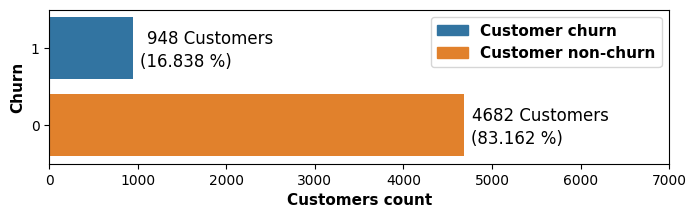

In [6]:
## B.	Churn 1
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
Churn = Commerce2.copy()
colors =[]
plt.figure(figsize=(8,2))
ax = sns.countplot(y='Churn', data=Churn)
for a in ax.patches:
    ax.annotate('('+format(( a.get_width()/5630)*100,'.3f')+' %)', (a.get_width()+600,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+870, -0.3+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    colors.append(a.get_facecolor())
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylabel('Churn', fontsize=11,weight='bold')
plt.xlabel('Customers count', fontsize=11,weight='bold')
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
ax.legend(handles=[blue_line1,blue_line0])
plt.xlim(0,7000)
plt.show()

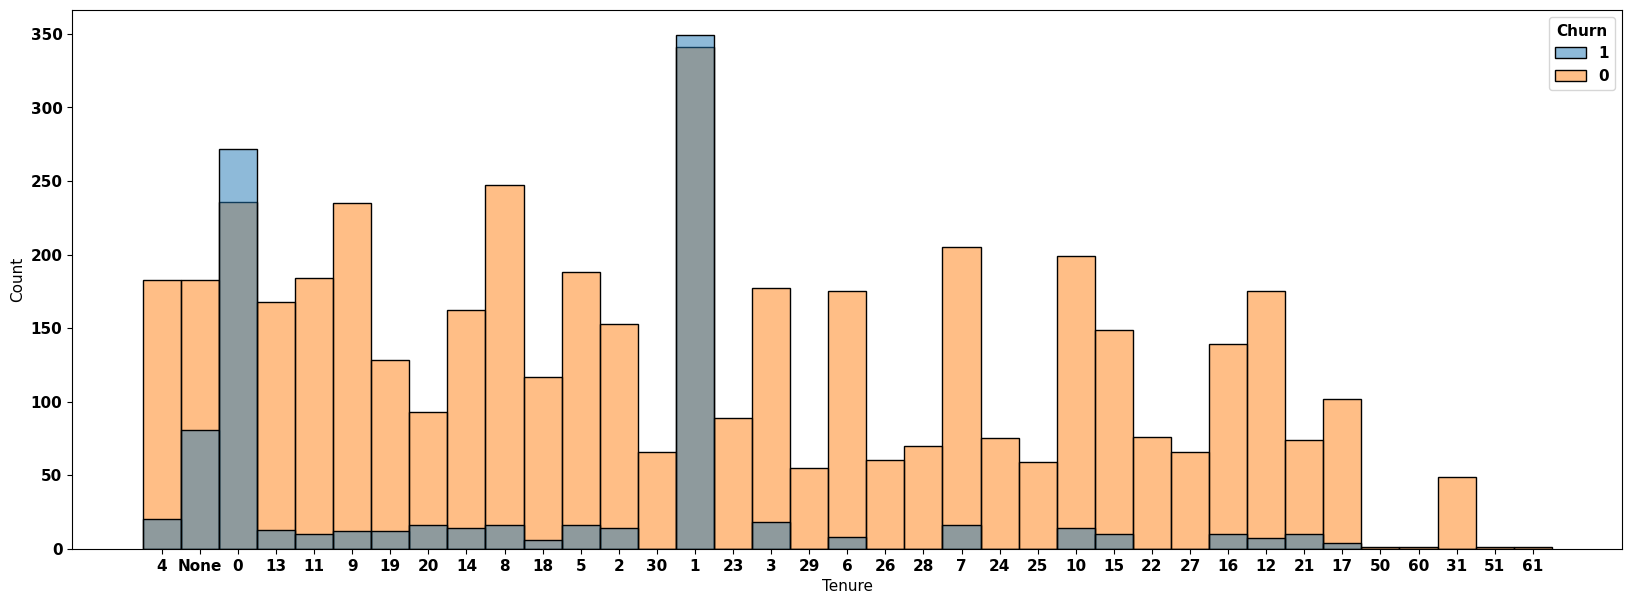

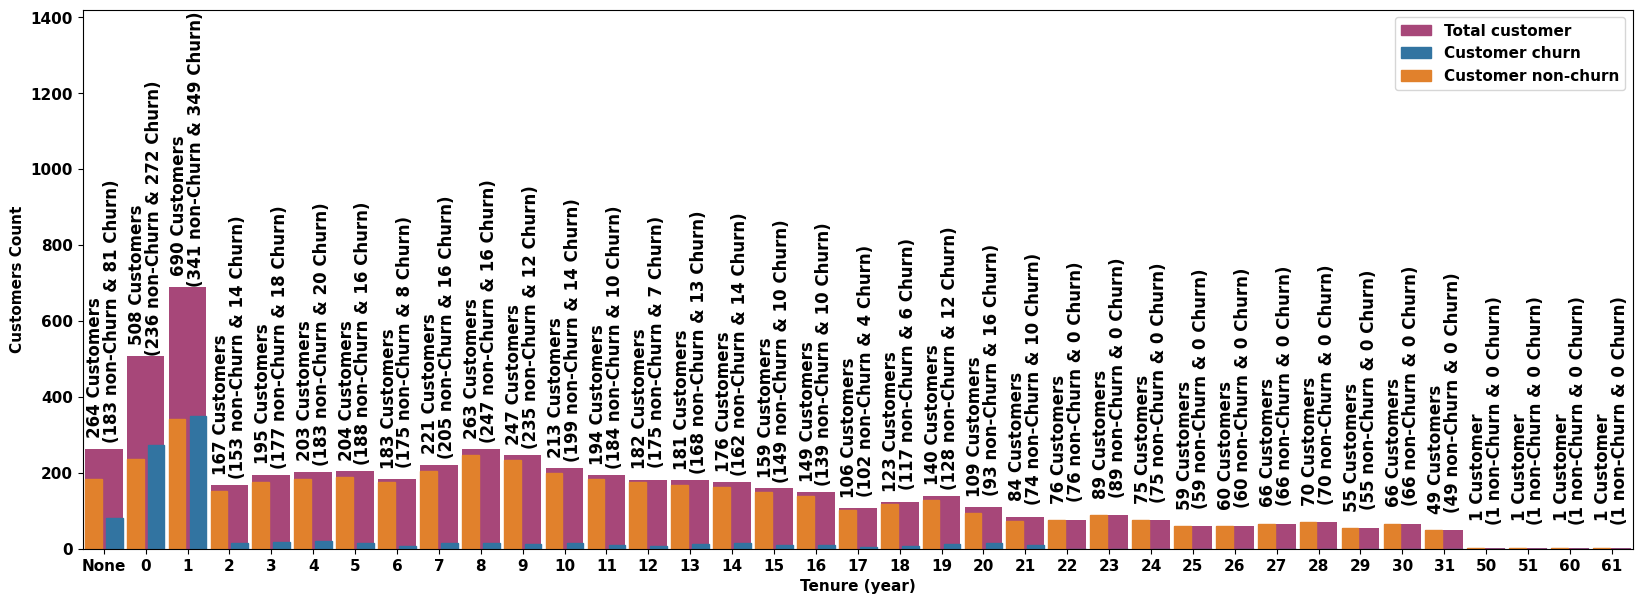

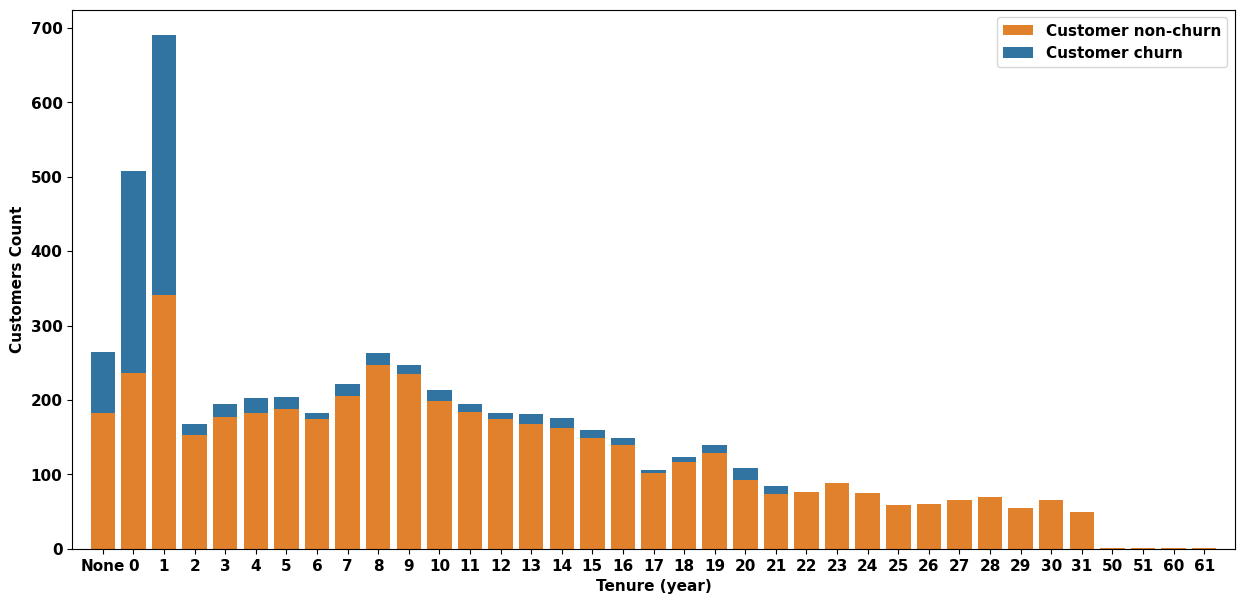

In [8]:
## C.	Tenure 2
import matplotlib.pyplot as plt
import numpy as np
Tenure = Commerce2.copy()
Tenure['Tenure']=Tenure['Tenure'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(20,7))
ax = sns.histplot(data=Tenure, x=Tenure['Tenure'], hue='Churn')
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(20,7))
ax = sns.countplot(x='Tenure', data=Tenure,width=0.9 , order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate(str(int(a.get_height()) ) +' Customers' if a.get_height()>1 else '1 Customer' , (-0.2+a.get_x() + a.get_width()/2., 250+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( '(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (0.2+ a.get_x() + a.get_width()/2., 400+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    colors.append(a.get_facecolor())
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), 0.4, f21[i], linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x()+0.5, a.get_y()), 0.4, f22[i], linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0])
plt.ylim(0,1420)
plt.xlabel('Tenure (year)',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.show()
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(15,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Tenure (year)',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,37)
plt.show()

[348, 276, 324]


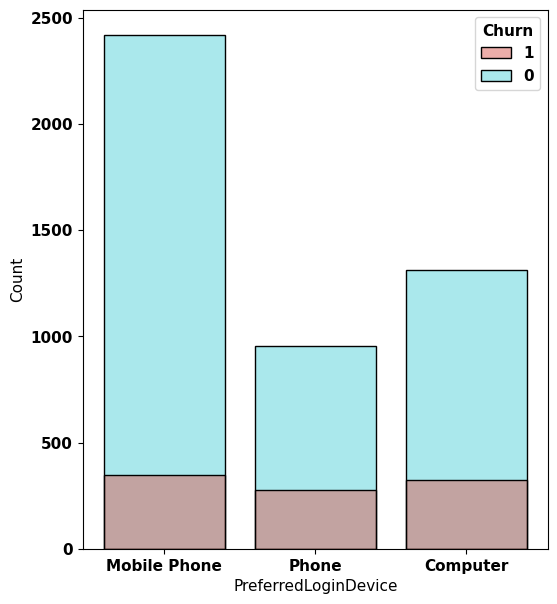

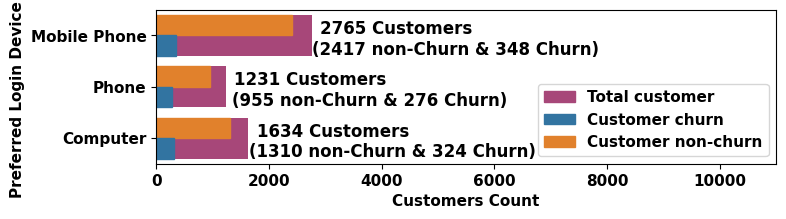

[[1310, 955, 2417], [324, 276, 348]]
[1310, 955, 2417]
[324, 276, 348]


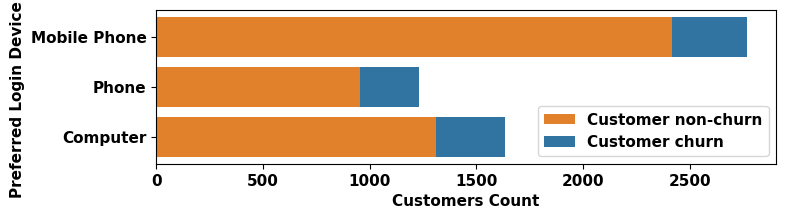

In [9]:
## D.	Preferred Login Device 3
PreferredLoginDevice = Commerce2.copy()
PreferredLoginDevice['PreferredLoginDevice']=PreferredLoginDevice['PreferredLoginDevice'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(6,7))
ax = sns.histplot(data=PreferredLoginDevice, x=PreferredLoginDevice['PreferredLoginDevice'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
print(f22)
plt.figure(figsize=(8,2))
ax = sns.countplot(y='PreferredLoginDevice', data=PreferredLoginDevice ,palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' + str(f22[i]) +' Churn)', (a.get_width()+2550,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+1500, -0.4+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    colors.append(a.get_facecolor())
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=4)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,11000)
plt.ylabel('Preferred Login Device   k',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
f6.reverse()
data=[f21,f22]
print(data)
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    print(d)
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Preferred Login Device   k',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

[3, 1, 2]


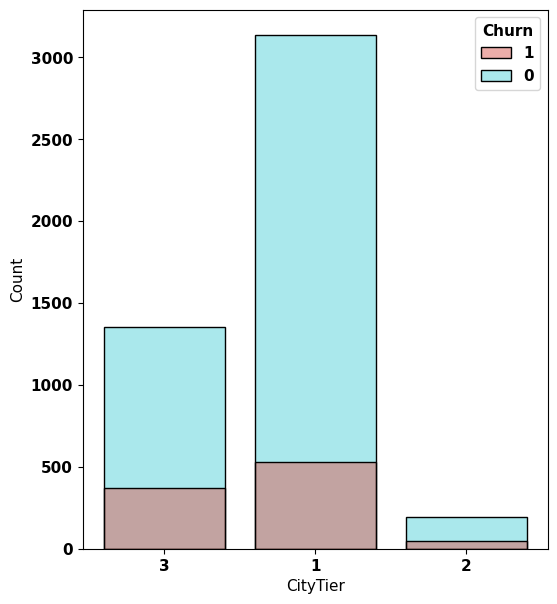

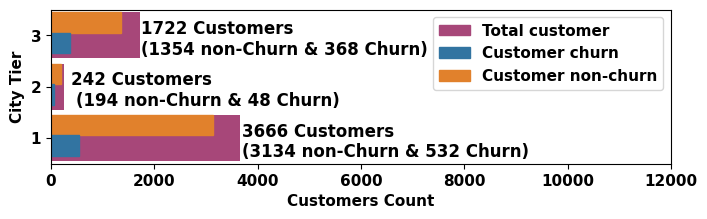

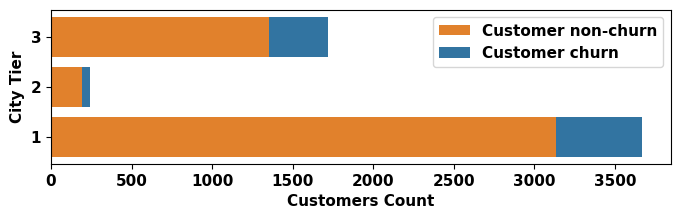

In [10]:
## E.	City Tier 4
CityTier = Commerce2.copy()
CityTier['CityTier']=CityTier['CityTier'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(6,7))
ax = sns.histplot(data=CityTier, x=CityTier['CityTier'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
print(XN)
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]>XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(8,2))
ax = sns.countplot(y='CityTier', data=CityTier,width=0.9,order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (a.get_width()+2800,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+1500, -0.4+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,12000)
plt.ylabel('City Tier',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
XS.reverse()
f6 =XS
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('City Tier',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

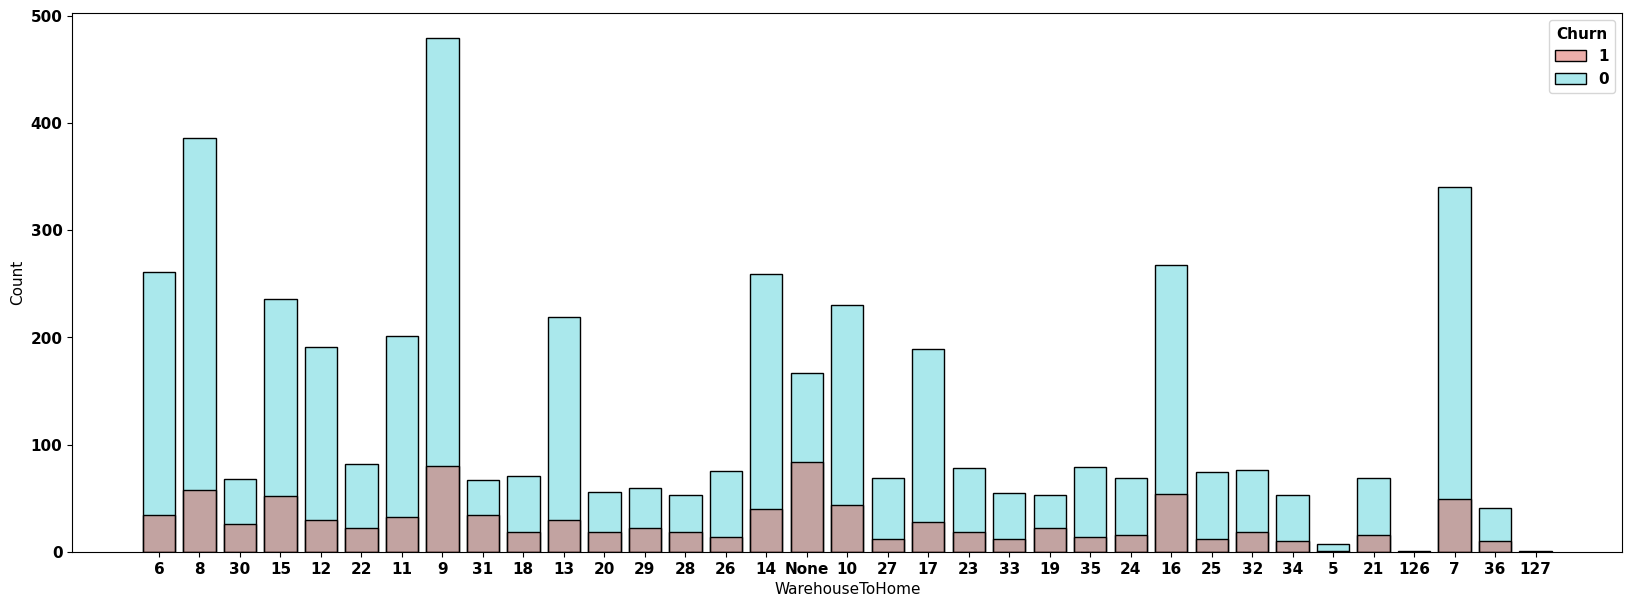

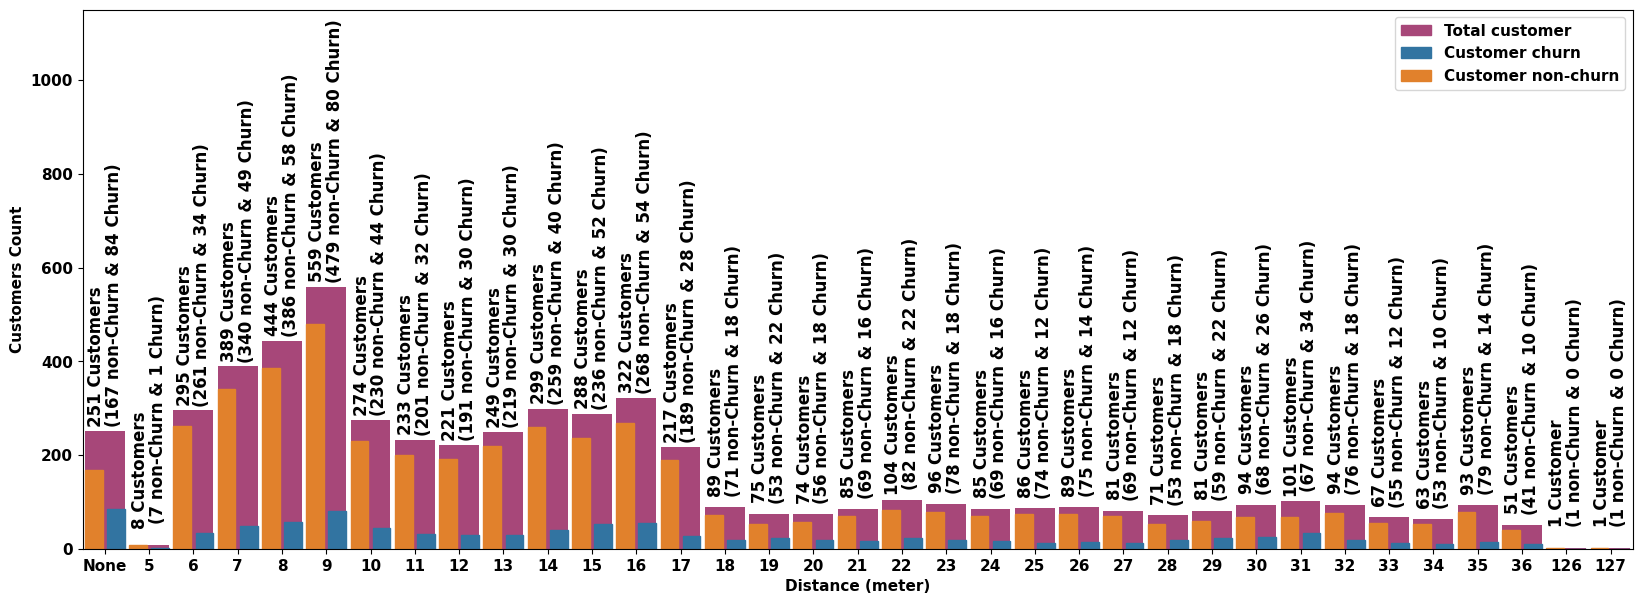

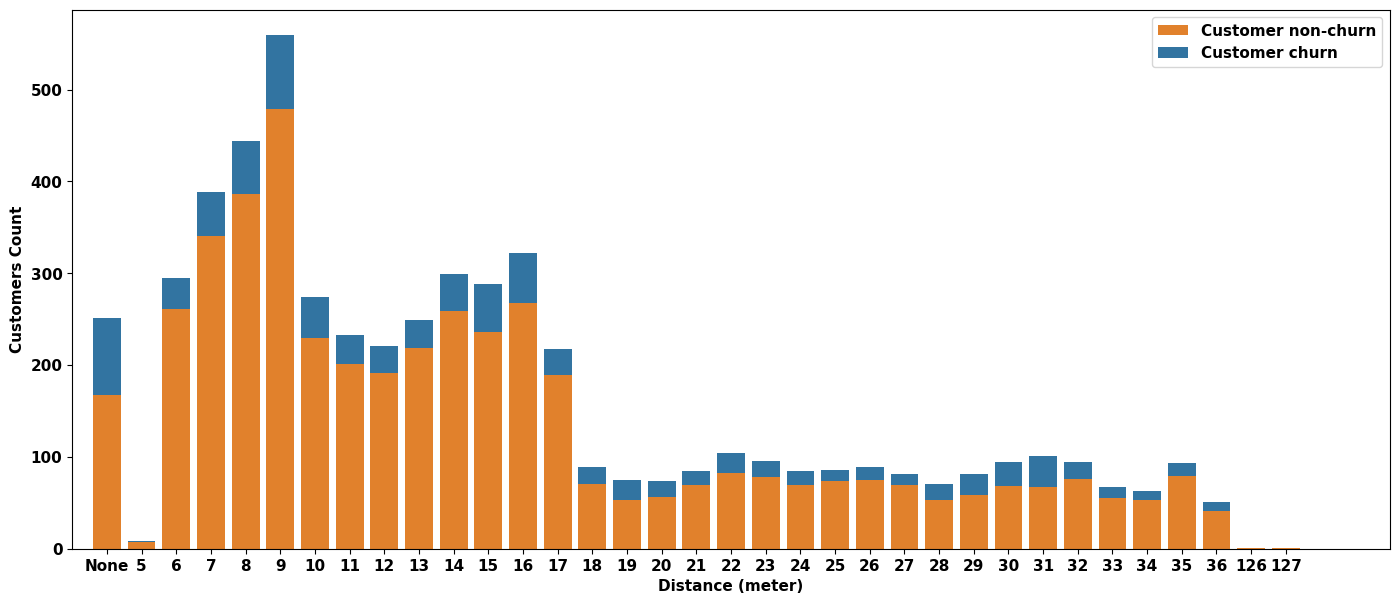

In [11]:
## F.	Warehouse To Home 5
WarehouseToHome = Commerce2.copy()
WarehouseToHome['WarehouseToHome']=WarehouseToHome['WarehouseToHome'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(20,7))
ax = sns.histplot(data=WarehouseToHome, x=WarehouseToHome['WarehouseToHome'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))

for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(20,7))
ax = sns.countplot(x='WarehouseToHome', data=WarehouseToHome,width=0.9 , order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate(str(int(a.get_height()) ) +' Customers' if a.get_height()>1 else '1 Customer' , (-0.2+a.get_x() + a.get_width()/2., 190+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( '(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (0.2+ a.get_x() + a.get_width()/2., 320+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), 0.4, f21[i], linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x()+0.5, a.get_y()), 0.4, f22[i], linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylim(0,1150)
plt.xlabel('Distance (meter)',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.show()
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(17,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Distance (meter)',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,37)
plt.show()

[356, 72, 59, 23, 140, 105, 193]


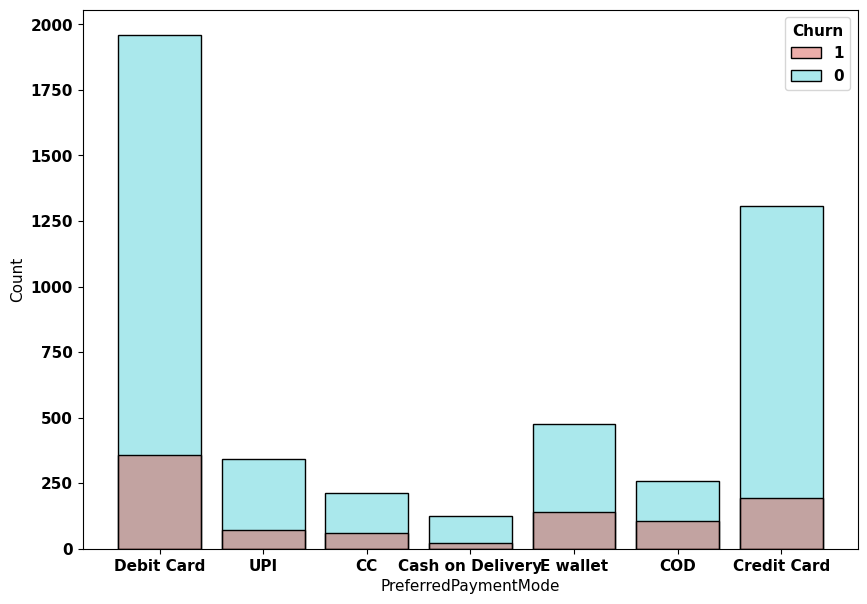

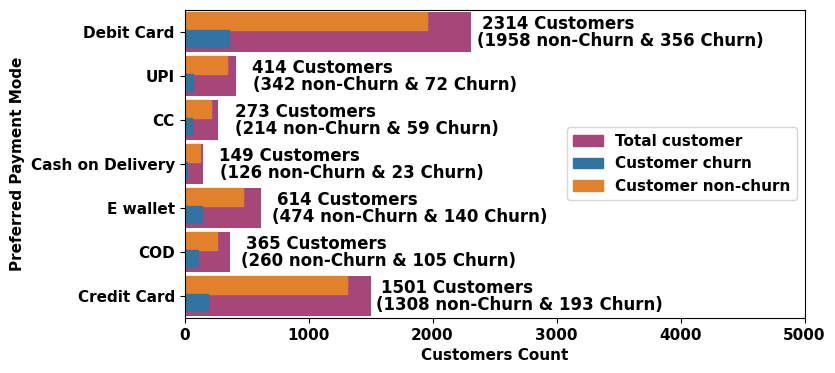

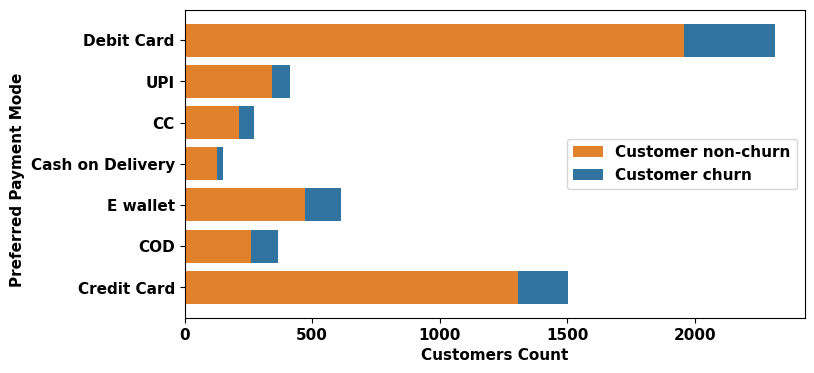

In [12]:
## G.	Preferred Payment Mode 6
PreferredPaymentMode = Commerce2.copy()
PreferredPaymentMode['PreferredPaymentMode']=PreferredPaymentMode['PreferredPaymentMode'].apply(lambda  x: x if x is not None else "None")
f6 =[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=PreferredPaymentMode, x=PreferredPaymentMode['PreferredPaymentMode'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
print(f22)
plt.figure(figsize=(8,4))
ax = sns.countplot(y='PreferredPaymentMode', data=PreferredPaymentMode,width=0.9,palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f2[i]) + ' non-Churn & ' +str(f2[i+int(len(f2)/2)]) +' Churn)', (a.get_width()+1200,-0.1+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+700, -0.5+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=5)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,5000)
plt.ylabel('Preferred Payment Mode',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
f6.reverse()
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Preferred Payment Mode      ',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

[348, 600]


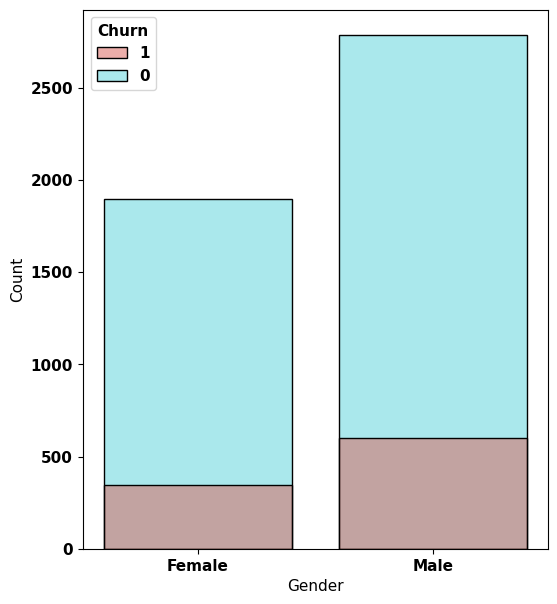

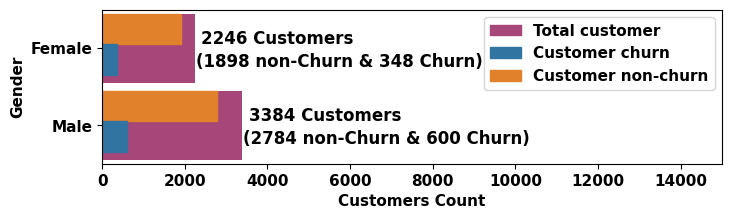

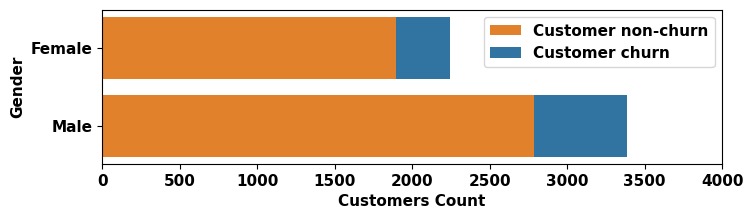

In [13]:
## H.	Gender 7
Gender = Commerce2.copy()
Gender['Gender']=Gender['Gender'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(6,7))
ax = sns.histplot(data=Gender, x=Gender['Gender'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
print(f22)
plt.figure(figsize=(8,2))
ax = sns.countplot(y='Gender', data=Gender,width=0.9,palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f2[i]) + ' non-Churn & ' +str(f2[i+int(len(f2)/2)]) +' Churn)', (a.get_width()+3500,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+2000, -0.3+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,15000)
plt.ylabel('Gender',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
f6.reverse()
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Gender',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(0,4000)
plt.show()

[3, 2, -1, 1, 0, 4, 5]


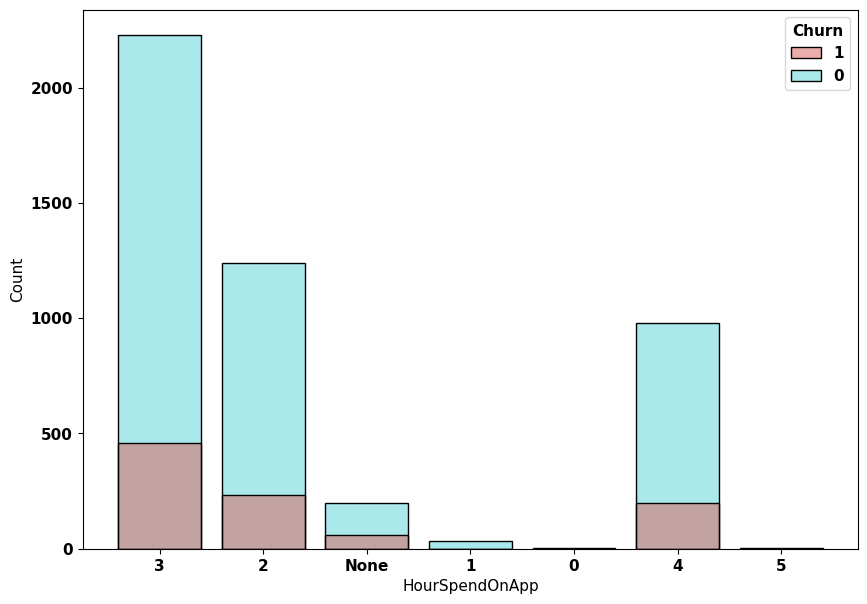

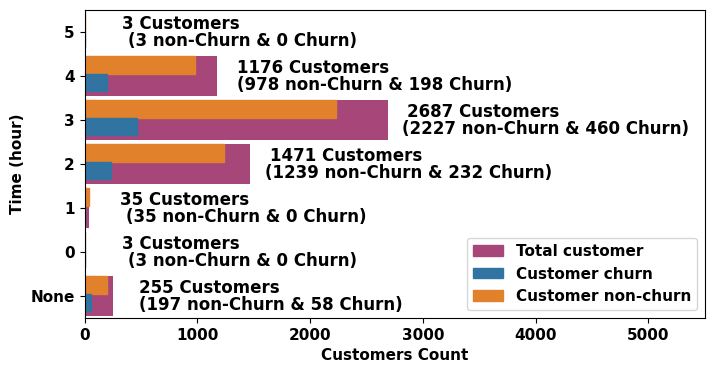

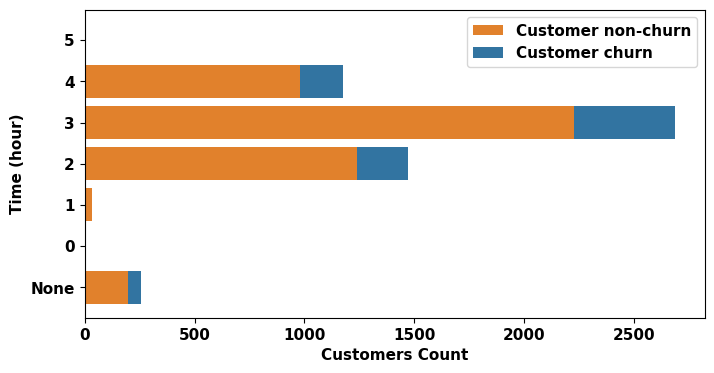

In [14]:
## I.	Hour Spend On App 8
HourSpendOnApp = Commerce2.copy()
HourSpendOnApp['HourSpendOnApp']=HourSpendOnApp['HourSpendOnApp'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=HourSpendOnApp, x=HourSpendOnApp['HourSpendOnApp'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
print(XN)
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]>XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(8,4))
ax = sns.countplot(y='HourSpendOnApp', data=HourSpendOnApp,width=0.9,order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (a.get_width()+1400,-0.1+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+ 850, -0.5+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=4)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,5500)
plt.ylabel('Time (hour)',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
XS.reverse()
f6 =XS
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Time (hour)',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

[3, 4, 5, 2, 1, 6]


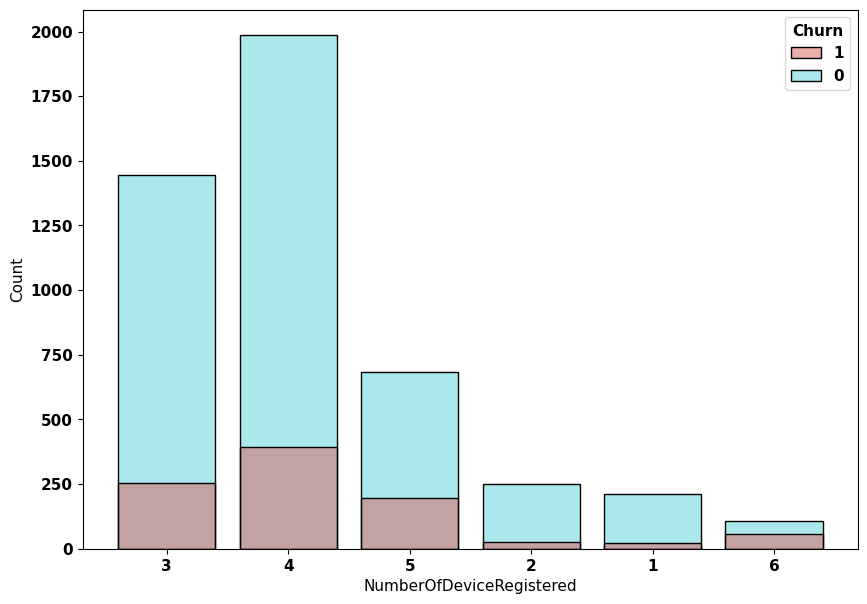

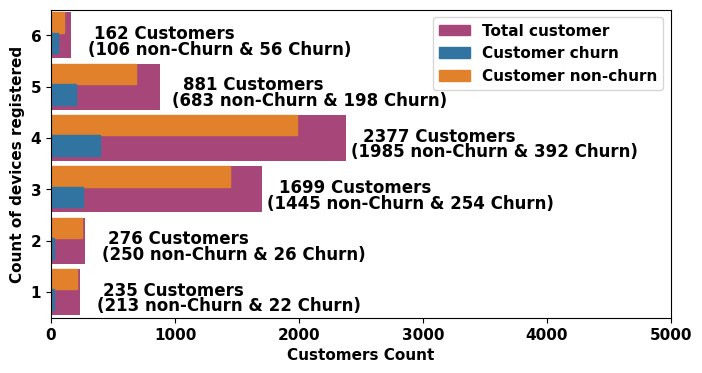

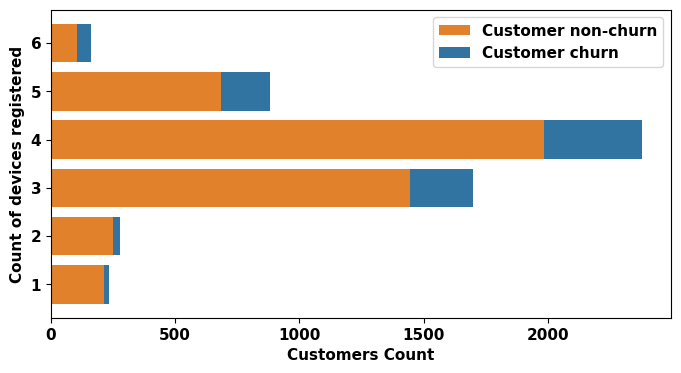

In [26]:
## J.	Number Of Device Registered 9
NumberOfDeviceRegistered = Commerce2.copy()
NumberOfDeviceRegistered['NumberOfDeviceRegistered']=NumberOfDeviceRegistered['NumberOfDeviceRegistered'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=NumberOfDeviceRegistered, x=NumberOfDeviceRegistered['NumberOfDeviceRegistered'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
print(XN)
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]>XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(8,4))
ax = sns.countplot(y='NumberOfDeviceRegistered', data=NumberOfDeviceRegistered,width=0.9,order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (a.get_width()+1200,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+750, -0.3+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,5000)
plt.ylabel('Count of devices registered',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
XS.reverse()
f6 =XS
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Count of devices registered',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

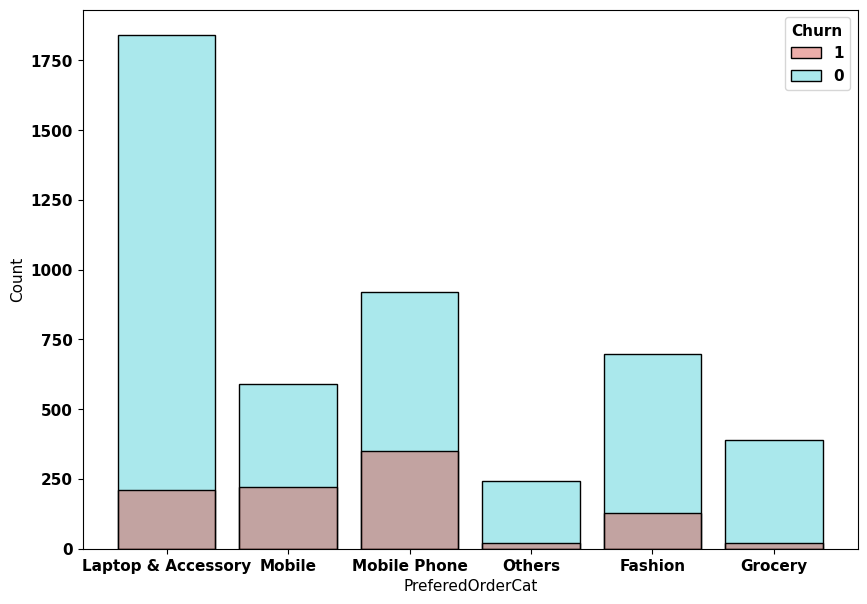

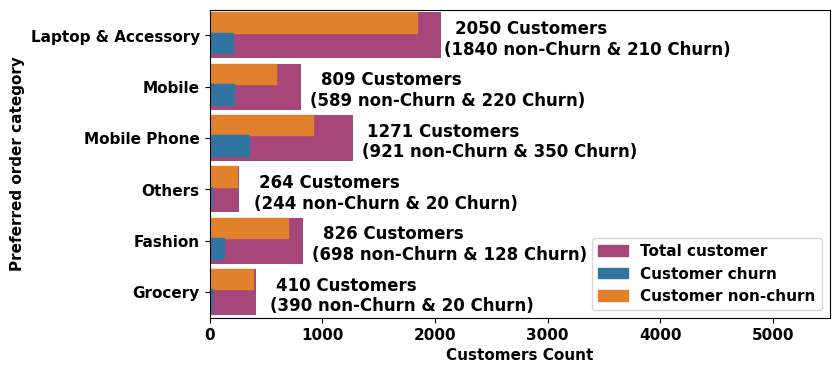

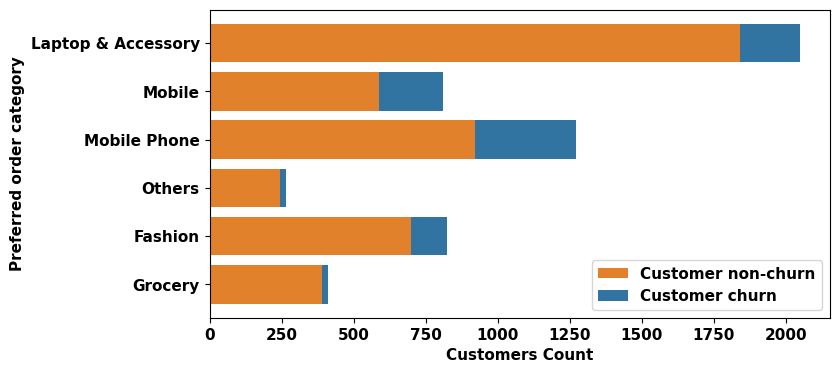

In [25]:
## K.	Prefered Order Cat 10
PreferedOrderCat = Commerce2.copy()
PreferedOrderCat['PreferedOrderCat']=PreferedOrderCat['PreferedOrderCat'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=PreferedOrderCat, x=PreferedOrderCat['PreferedOrderCat'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
plt.figure(figsize=(8,4))
ax = sns.countplot(y='PreferedOrderCat', data=PreferedOrderCat,width=0.9,palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (a.get_width()+1300,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+800,-0.4 +a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=4)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,5500)
plt.ylabel('Preferred order category',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
f6.reverse()
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Preferred order category',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

[2, 3, 5, 4, 1]


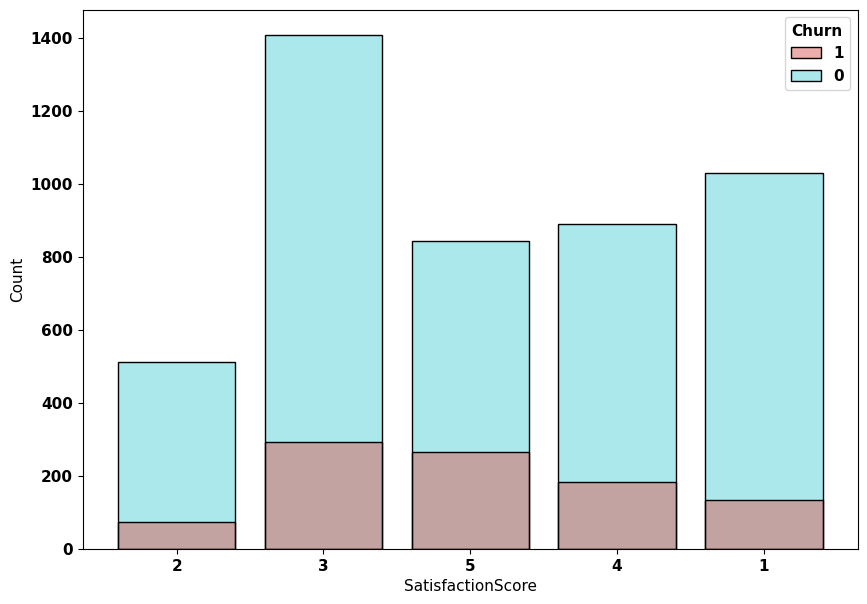

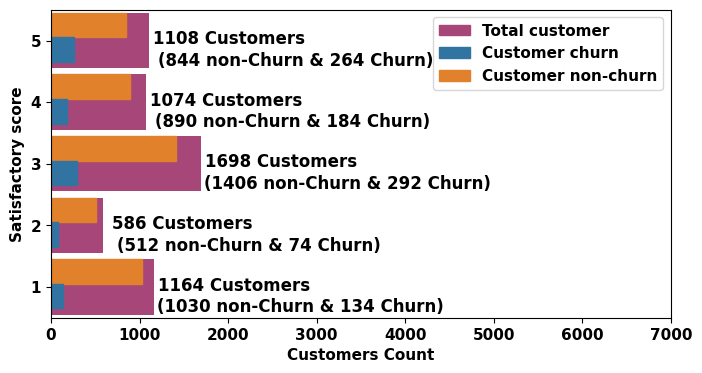

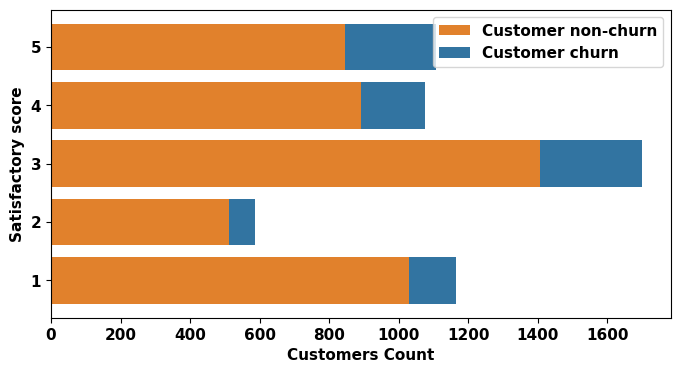

In [24]:
## L.	Satisfaction Score 11
SatisfactionScore = Commerce2.copy()
SatisfactionScore['SatisfactionScore']=SatisfactionScore['SatisfactionScore'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=SatisfactionScore, x=SatisfactionScore['SatisfactionScore'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
print(XN)
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]>XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(8,4))
ax = sns.countplot(y='SatisfactionScore', data=SatisfactionScore,width=0.9,order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (a.get_width()+1650,0.1+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+900, -0.25+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,7000)
plt.ylabel('Satisfactory score',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
XS.reverse()
f6 =XS
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Satisfactory score',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

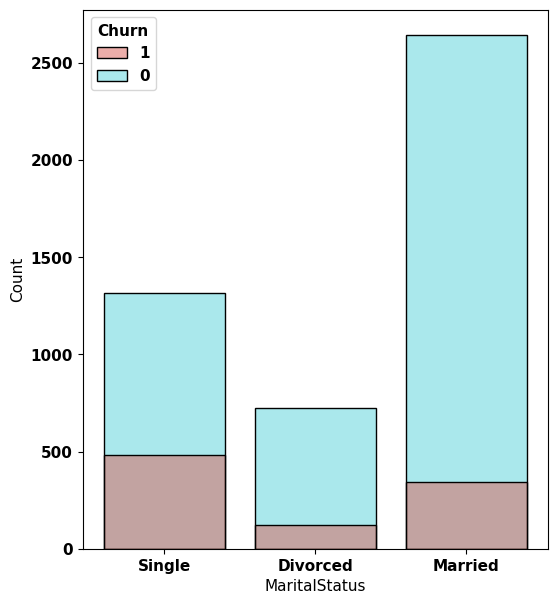

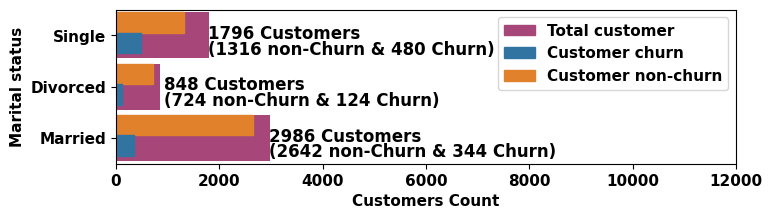

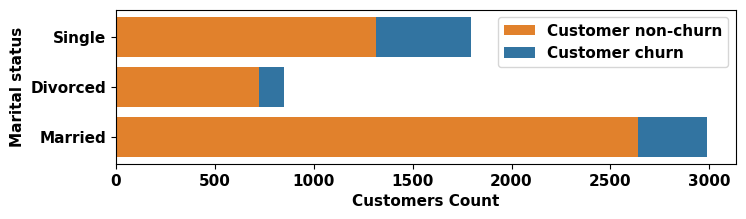

In [23]:
## M.	Marital Status 12
MaritalStatus = Commerce2.copy()
MaritalStatus['MaritalStatus']=MaritalStatus['MaritalStatus'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(6,7))
ax = sns.histplot(data=MaritalStatus, x=MaritalStatus['MaritalStatus'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
plt.figure(figsize=(8,2))
ax = sns.countplot(y='MaritalStatus', data=MaritalStatus,width=0.9,palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (a.get_width()+2750,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+1450, -0.3+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,12000)
plt.ylabel('Marital status',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
f21.reverse()
f22.reverse()
f6.reverse()
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Marital status',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

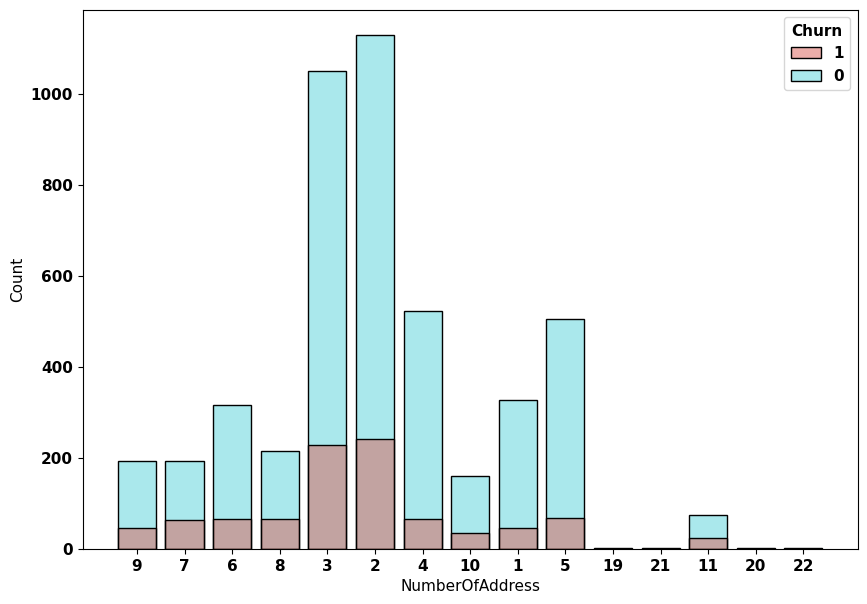

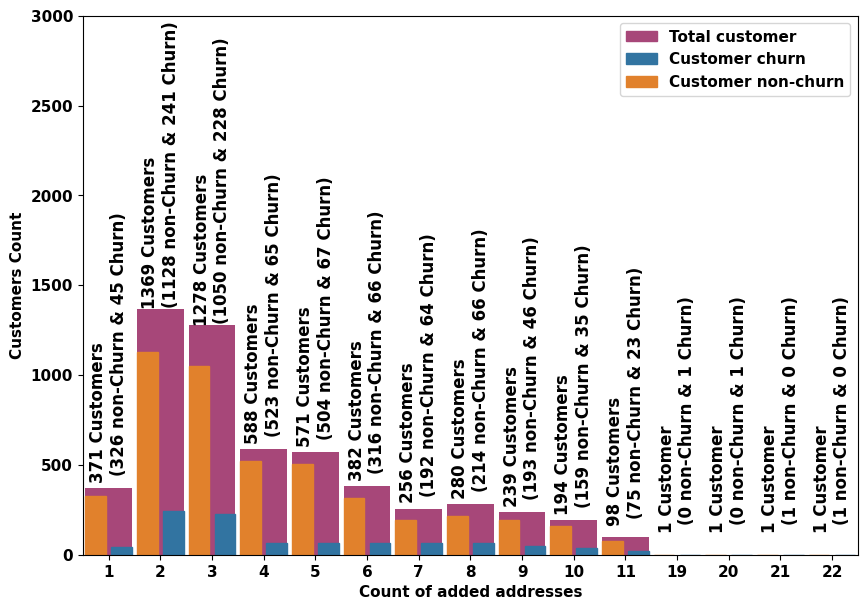

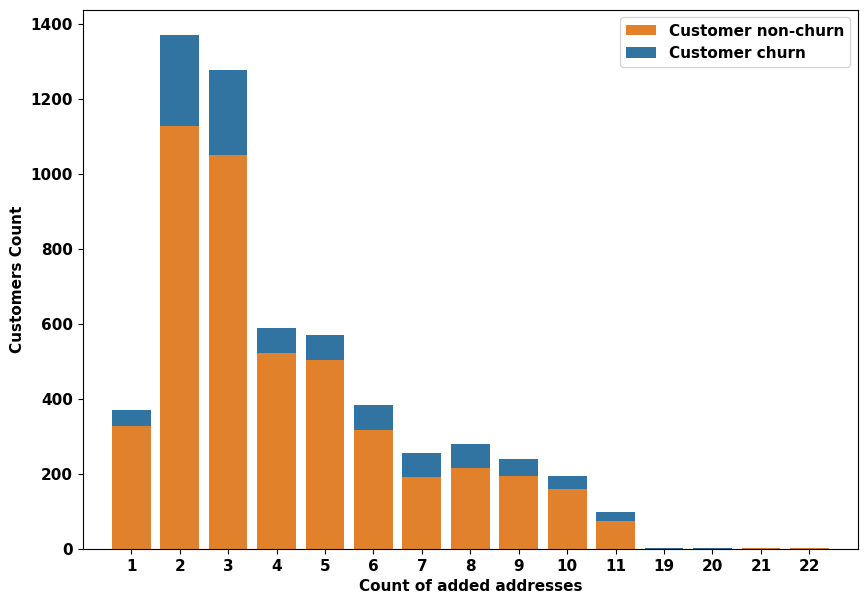

In [22]:
## N.	Number of Address 13
NumberOfAddress = Commerce2.copy()
NumberOfAddress['NumberOfAddress']=NumberOfAddress['NumberOfAddress'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=NumberOfAddress, x=NumberOfAddress['NumberOfAddress'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(10,7))
ax = sns.countplot(x='NumberOfAddress', data=NumberOfAddress,width=0.9, order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate(str(int(a.get_height()) ) +' Customers' if a.get_height()>1 else '1 Customer' , (-0.2+a.get_x() + a.get_width()/2., 500+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( '(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (0.2+ a.get_x() + a.get_width()/2., 880+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), 0.4, f21[i], linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x()+0.5, a.get_y()), 0.4, f22[i], linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    ch= ch+ f2[i]
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylim(0,3000)
plt.xlabel('Count of added addresses',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.show()
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(10,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Count of added addresses',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,15)
plt.show()

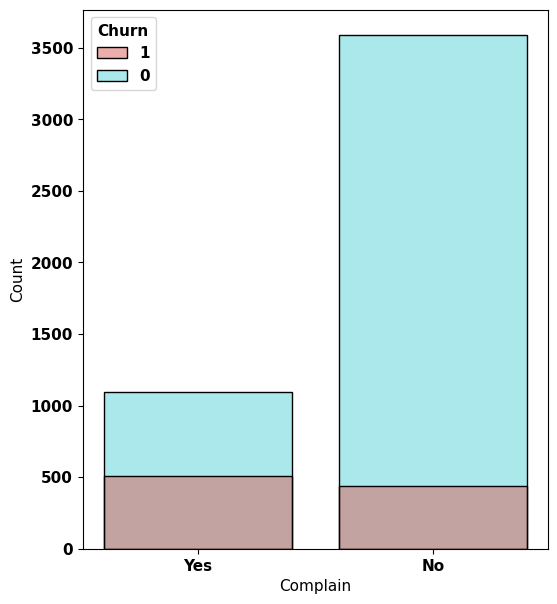

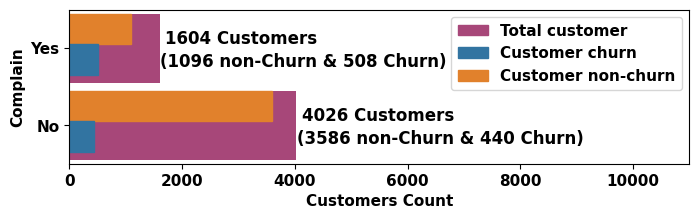

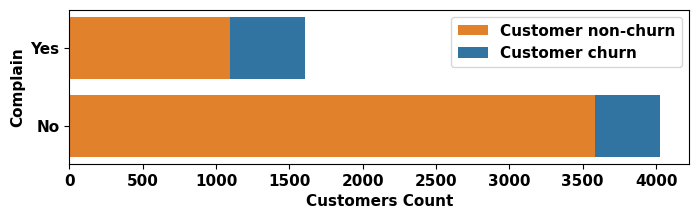

In [20]:
## O.	Complain 14
Complain = Commerce2.copy()
Complain['Complain']=Complain['Complain'].apply(lambda  x: "Yes" if x == '1' else "No")
f6=[]
plt.figure(figsize=(6,7))
ax = sns.histplot(data=Complain, x=Complain['Complain'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
plt.figure(figsize=(8,2))
ax = sns.countplot(y='Complain', data=Complain,width=0.9, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate('(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (a.get_width()+2550,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+1450, -0.3+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ch= ch+ f2[i]
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), f21[i], 0.4, linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()+0.4),f22[i], 0.4, linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlim(0,11000)
plt.ylabel('Complain',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.show()
XS =['Yes', 'No']
f21.reverse()
f22.reverse()
XS.reverse()
f6 =XS
data=[f21,f22]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))
fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Complain',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

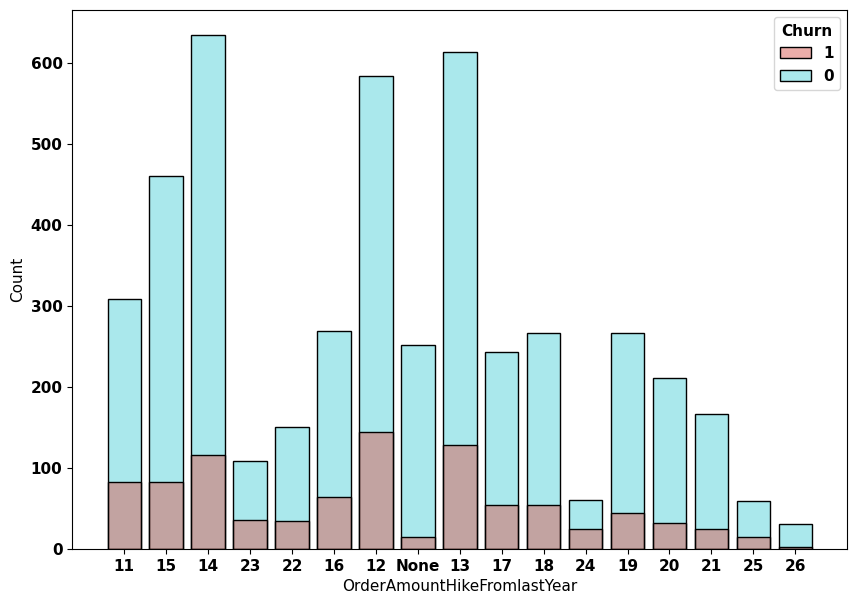

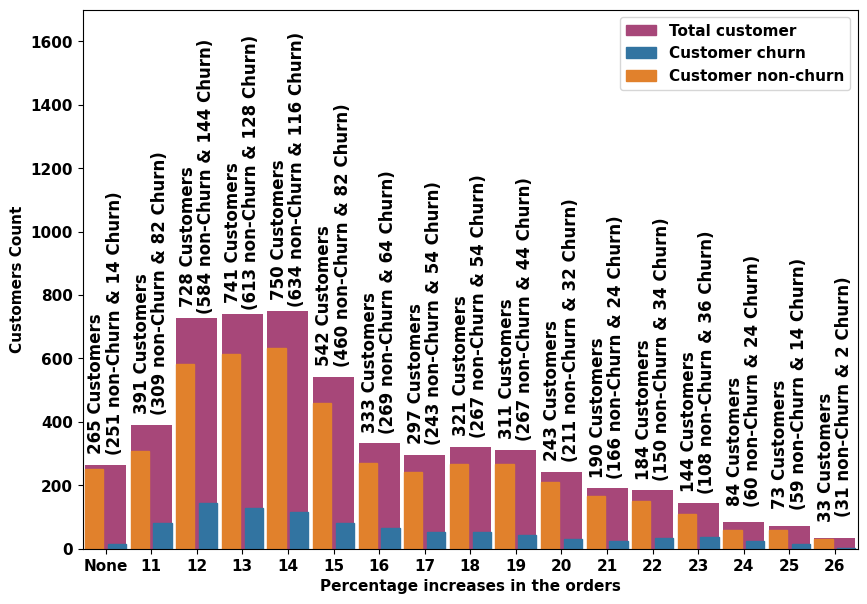

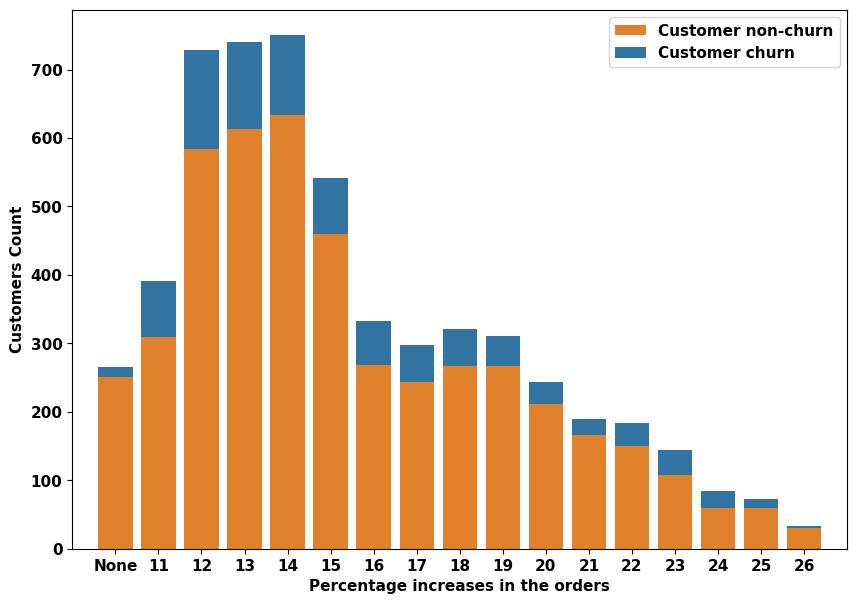

In [19]:
## P.	Order Amount Hike From Last Year 15
OrderAmountHikeFromlastYear = Commerce2.copy()
OrderAmountHikeFromlastYear['OrderAmountHikeFromlastYear']=OrderAmountHikeFromlastYear['OrderAmountHikeFromlastYear'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=OrderAmountHikeFromlastYear, x=OrderAmountHikeFromlastYear['OrderAmountHikeFromlastYear'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(10,7))
ax = sns.countplot(x='OrderAmountHikeFromlastYear', data=OrderAmountHikeFromlastYear,width=0.9, order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate(str(int(a.get_height()) ) +' Customers' if a.get_height()>1 else '1 Customer' , (-0.2+a.get_x() + a.get_width()/2., 300+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( '(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (0.2+ a.get_x() + a.get_width()/2., 490+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), 0.4, f21[i], linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x()+0.5, a.get_y()), 0.4, f22[i], linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    ch= ch+ f2[i]
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylim(0,1700)
plt.xlabel('Percentage increases in the orders',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.show()
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(10,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Percentage increases in the orders',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,17)
plt.show()

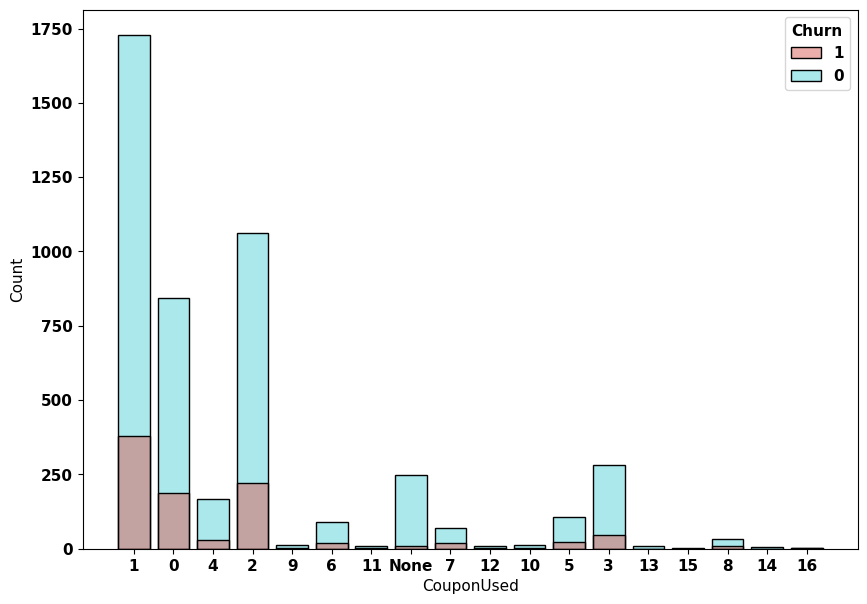

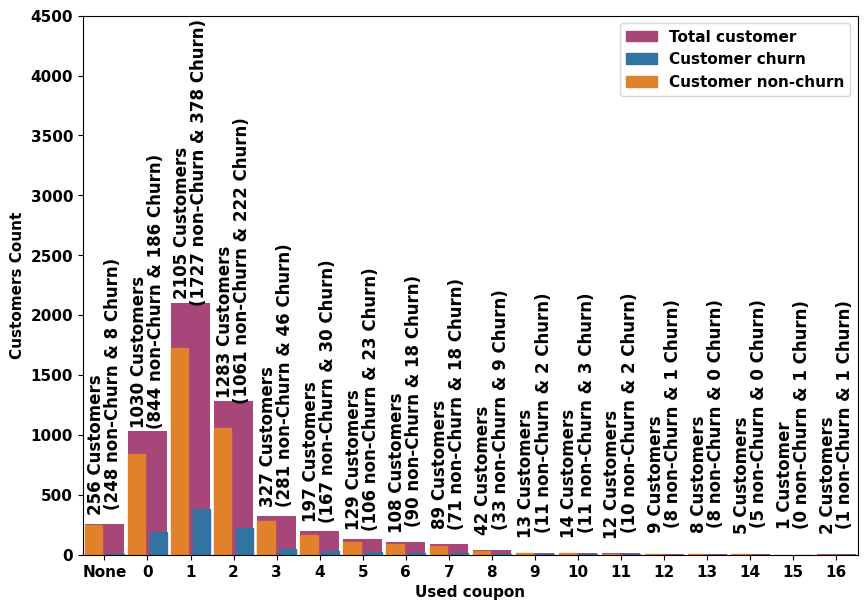

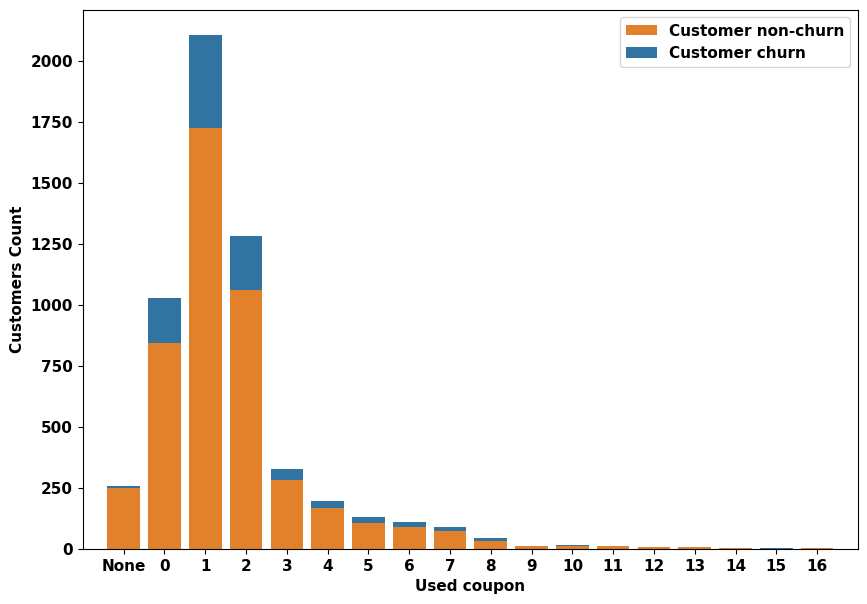

In [18]:
## Q.	Coupon Used 16
CouponUsed = Commerce2.copy()
CouponUsed['CouponUsed']=CouponUsed['CouponUsed'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=CouponUsed, x=CouponUsed['CouponUsed'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(10,7))
ax = sns.countplot(x='CouponUsed', data=CouponUsed,width=0.9, order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate(str(int(a.get_height()) ) +' Customers' if a.get_height()>1 else '1 Customer' , (-0.2+a.get_x() + a.get_width()/2., 780+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( '(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (0.2+ a.get_x() + a.get_width()/2., 1290+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), 0.4, f21[i], linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x()+0.5, a.get_y()), 0.4, f22[i], linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    ch= ch+ f2[i]
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylim(0,4500)
plt.xlabel('Used coupon',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.show()
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(10,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Used coupon',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,len(x))
plt.show()

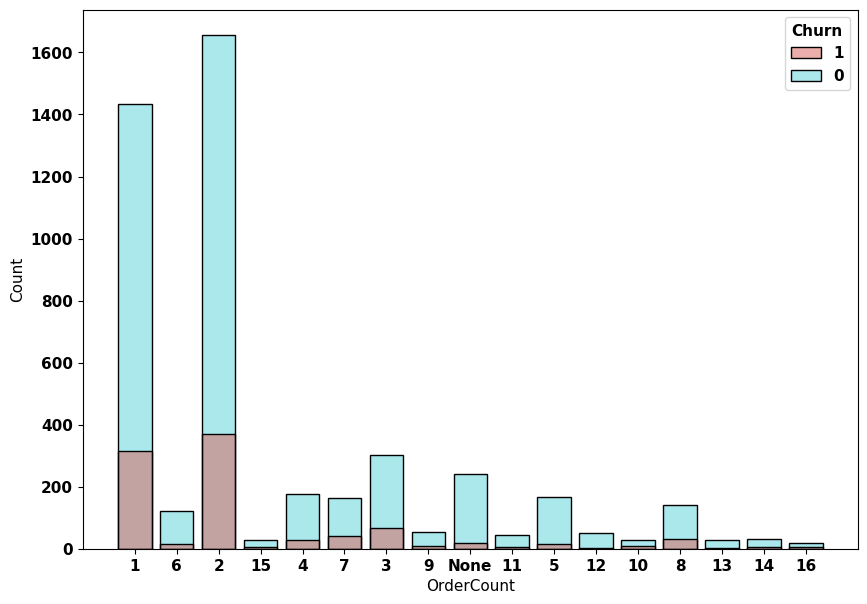

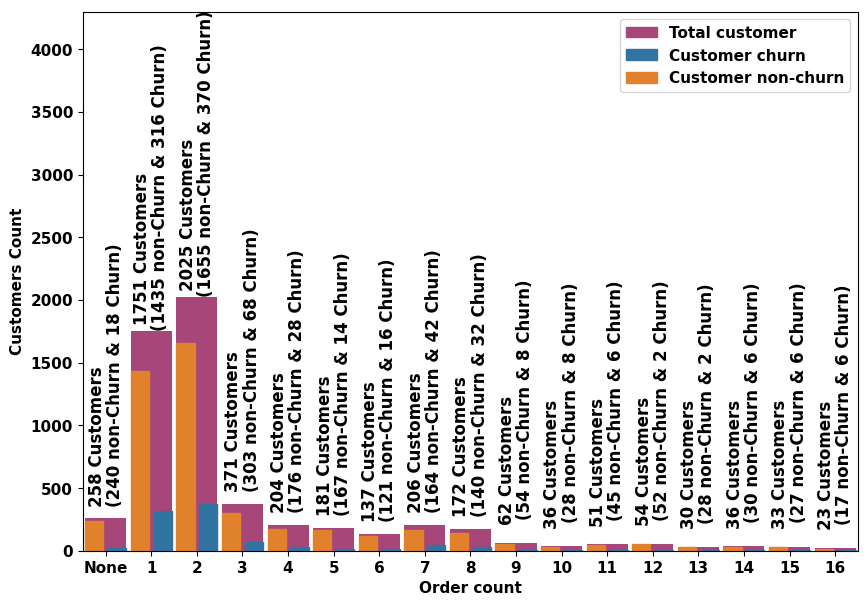

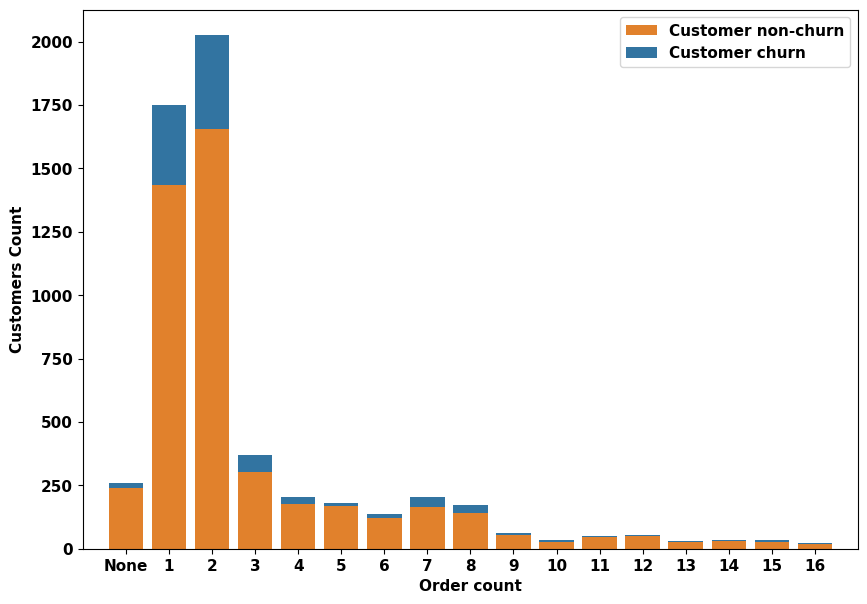

In [17]:
## R.	OrderCount 17
OrderCount = Commerce2.copy()
OrderCount['OrderCount']=OrderCount['OrderCount'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=OrderCount, x=OrderCount['OrderCount'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(10,7))
ax = sns.countplot(x='OrderCount', data=OrderCount,width=0.9, order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate(str(int(a.get_height()) ) +' Customers' if a.get_height()>1 else '1 Customer' , (-0.2+a.get_x() + a.get_width()/2., 770+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( '(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (0.2+ a.get_x() + a.get_width()/2., 1260+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), 0.4, f21[i], linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x()+0.5, a.get_y()), 0.4, f22[i], linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    ch= ch+ f2[i]
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylim(0,4300)
plt.xlabel('Order count',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.show()
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(10,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Order count',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,len(x))
plt.show()

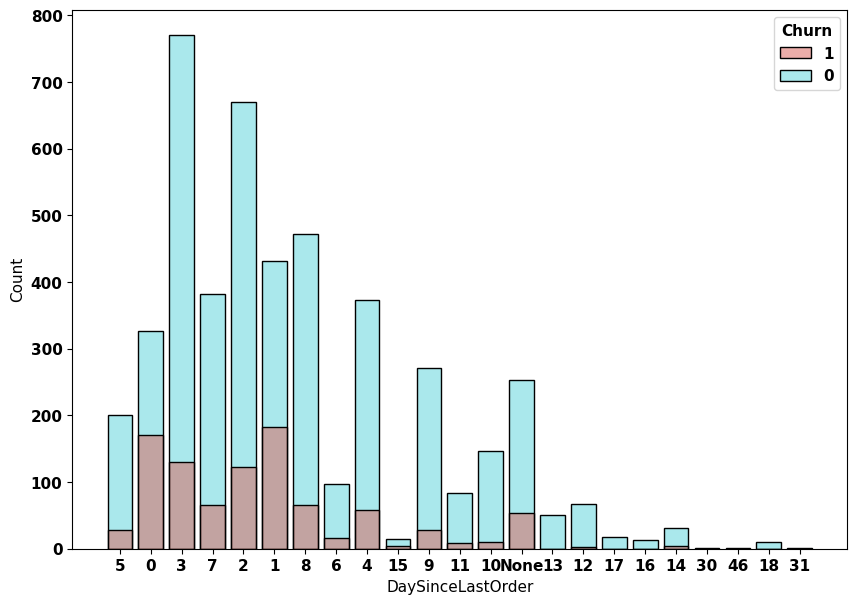

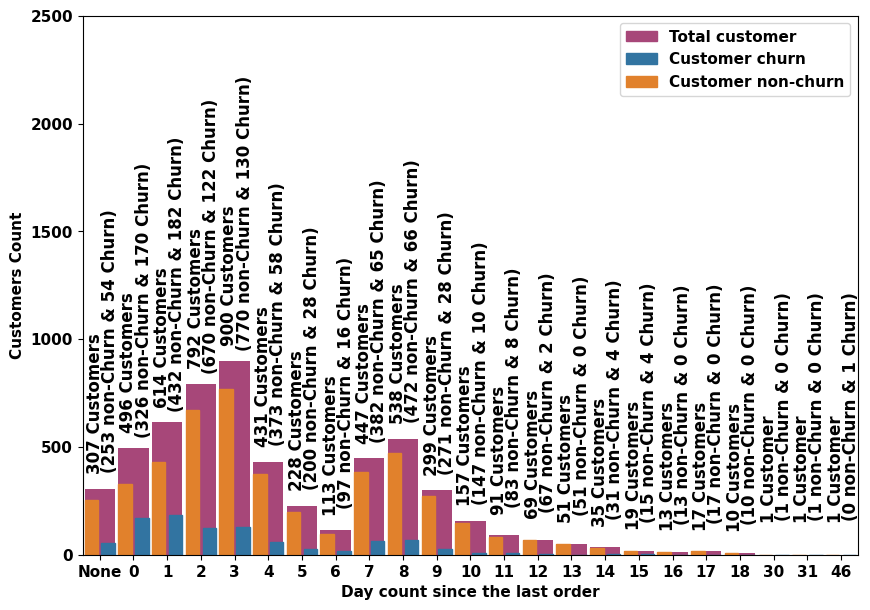

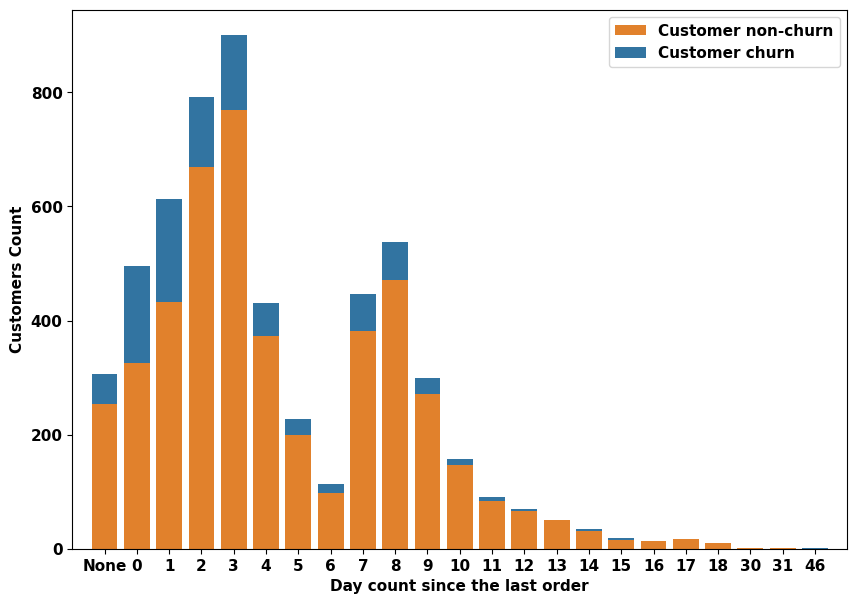

In [16]:
## S.	Day Since Last Order
DaySinceLastOrder = Commerce2.copy()
DaySinceLastOrder['DaySinceLastOrder']=DaySinceLastOrder['DaySinceLastOrder'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(10,7))
ax = sns.histplot(data=DaySinceLastOrder, x=DaySinceLastOrder['DaySinceLastOrder'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
plt.figure(figsize=(10,7))
ax = sns.countplot(x='DaySinceLastOrder', data=DaySinceLastOrder,width=0.9, order = XS, palette = sns.mpl_palette("magma", 1))
i=0
ch=0
noch=0
for a in ax.patches:
    ax.annotate(str(int(a.get_height()) ) +' Customers' if a.get_height()>1 else '1 Customer' , (-0.15+a.get_x() + a.get_width()/2., 460+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( '(' +str(f21[i]) + ' non-Churn & ' +str(f22[i]) +' Churn)', (0.3+ a.get_x() + a.get_width()/2., 750+a.get_height()),rotation=90,ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.add_patch(mpatches.Rectangle((a.get_x(), a.get_y()), 0.4, f21[i], linewidth=1, edgecolor=colors[1], facecolor=colors[1]))
    ax.add_patch(mpatches.Rectangle((a.get_x()+0.5, a.get_y()), 0.4, f22[i], linewidth=1, edgecolor=colors[0], facecolor=colors[0]))
    ch= ch+ f2[i]
    noch= noch + f2[i+int(len(f2)/2)]
    i=i+1
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
blue_line2 = mpatches.Patch(color=colors[2], label='Total customer')
ax.legend(handles=[blue_line2,blue_line1,blue_line0],loc=0)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylim(0,2500)
plt.xlabel('Day count since the last order',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.show()
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(10,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Day count since the last order',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,len(x))
plt.show()

* max Customers Count 
134
churn 98
non-churn 36
* min Customers Count 
1
churn 1
non-churn 0
* min Average cashback  
4
churn 4
non-churn 0
* max Average cashback  
4
churn 4
non-churn 0


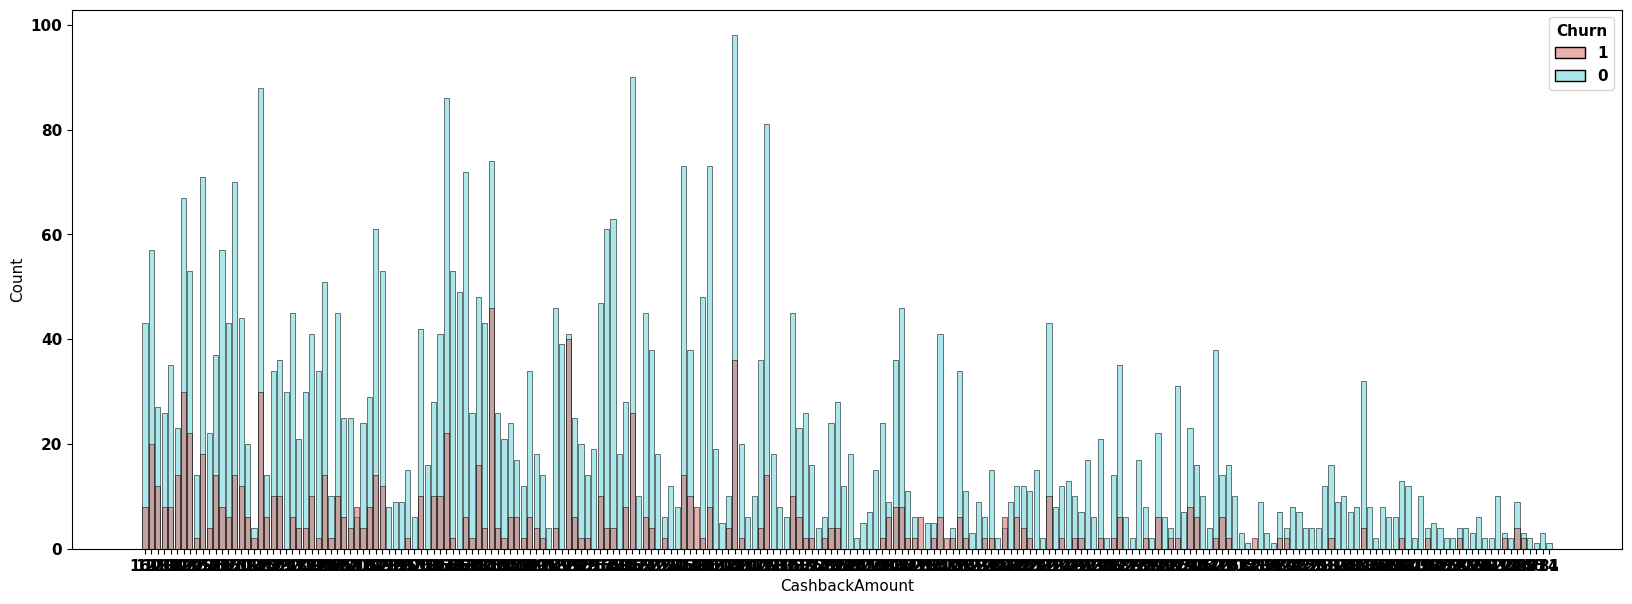

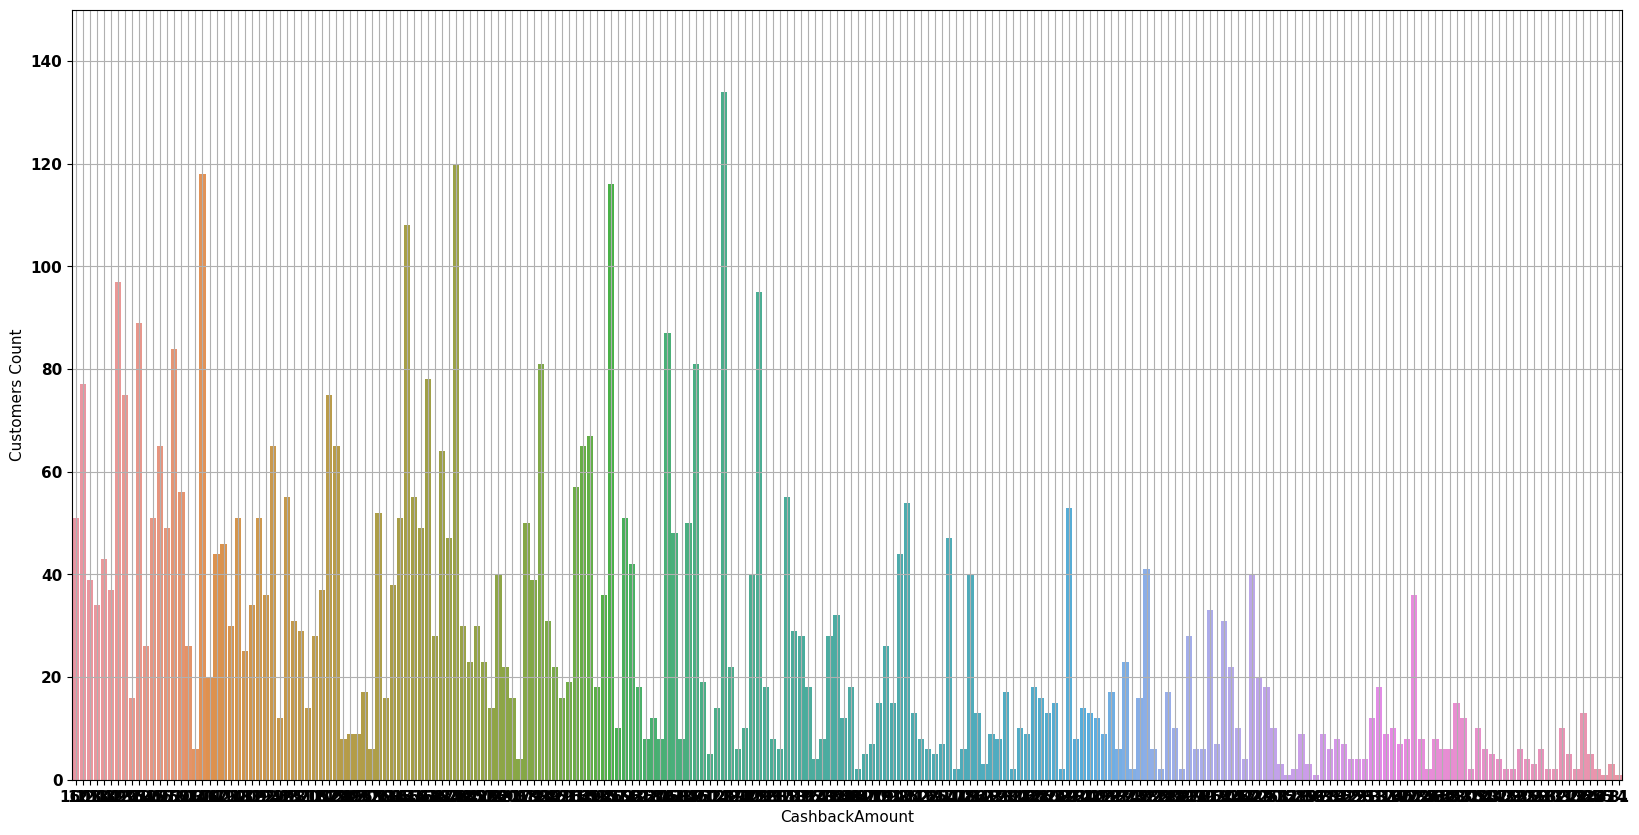

k  4682


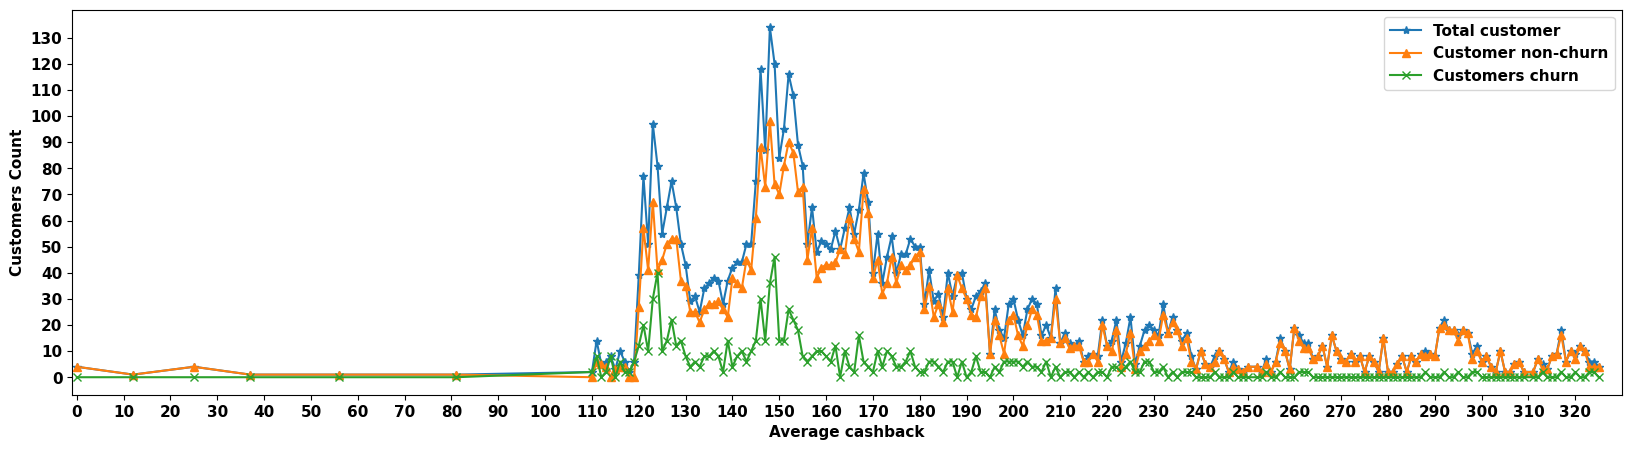

In [15]:
## T.	Cashback Amount
CashbackAmount = Commerce2.copy()
CashbackAmount['CashbackAmount']=CashbackAmount['CashbackAmount'].apply(lambda  x: x if x is not None else "None")
plt.figure(figsize=(20,7))
ax = sns.histplot(data=CashbackAmount, x=CashbackAmount['CashbackAmount'], hue='Churn',palette='hls', weights=1,shrink=0.8)
f = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
plt.figure(figsize=(20,10))
ax = sns.countplot(x='CashbackAmount', data=CashbackAmount,width=0.9)
plt.grid()
i=0
ch=0
noch=0
for a in ax.patches:
    ch= ch+ f2[i]
    noch= noch + f2[i+int(len(f2)/2)]
    f3.append(int(a.get_height()))
    f4.append(f2[i])
    f5.append(f2[i+int(len(f2)/2)])
    i=i+1
for label in ax.get_xticklabels():
   f6.append(int(label.get_text()))
from operator import itemgetter
indices, f66 = zip(*sorted(enumerate(f6), key=itemgetter(1)))
f33 = [f3[i] for i in indices]
f44 = [f4[i] for i in indices]
f55 = [f5[i] for i in indices]
print('* max Customers Count ')
print(f33[f66.index(148)])
print('churn',f44[f66.index(148)])
print('non-churn',f55[f66.index(148)])
print('* min Customers Count ')
print(f33[f66.index(12)])
print('churn',f44[f66.index(12)])
print('non-churn',f55[f66.index(12)])
print('* min Average cashback  ')
print(f33[f66.index(0)])
print('churn',f44[f66.index(0)])
print('non-churn',f55[f66.index(0)])
print('* max Average cashback  ')
print(f33[f66.index(325)])
print('churn',f44[f66.index(325)])
print('non-churn',f55[f66.index(325)])
plt.ylim(0,150)
plt.xlabel('CashbackAmount')
plt.ylabel('Customers Count')
plt.show()
print('k ',sum(f44))
plt.figure(figsize=(20,5))
plt.clf()
plt.plot(f66,f33 ,'-*',label='Total customer')
plt.plot(f66,f44, '-^',label='Customer non-churn')
plt.plot(f66, f55, '-x',label='Customers churn')
plt.yticks(range(0,140,10))
plt.xticks(range(0,330,10))
plt.xlabel('Average cashback',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend()
plt.xlim(-1,330)
plt.show()

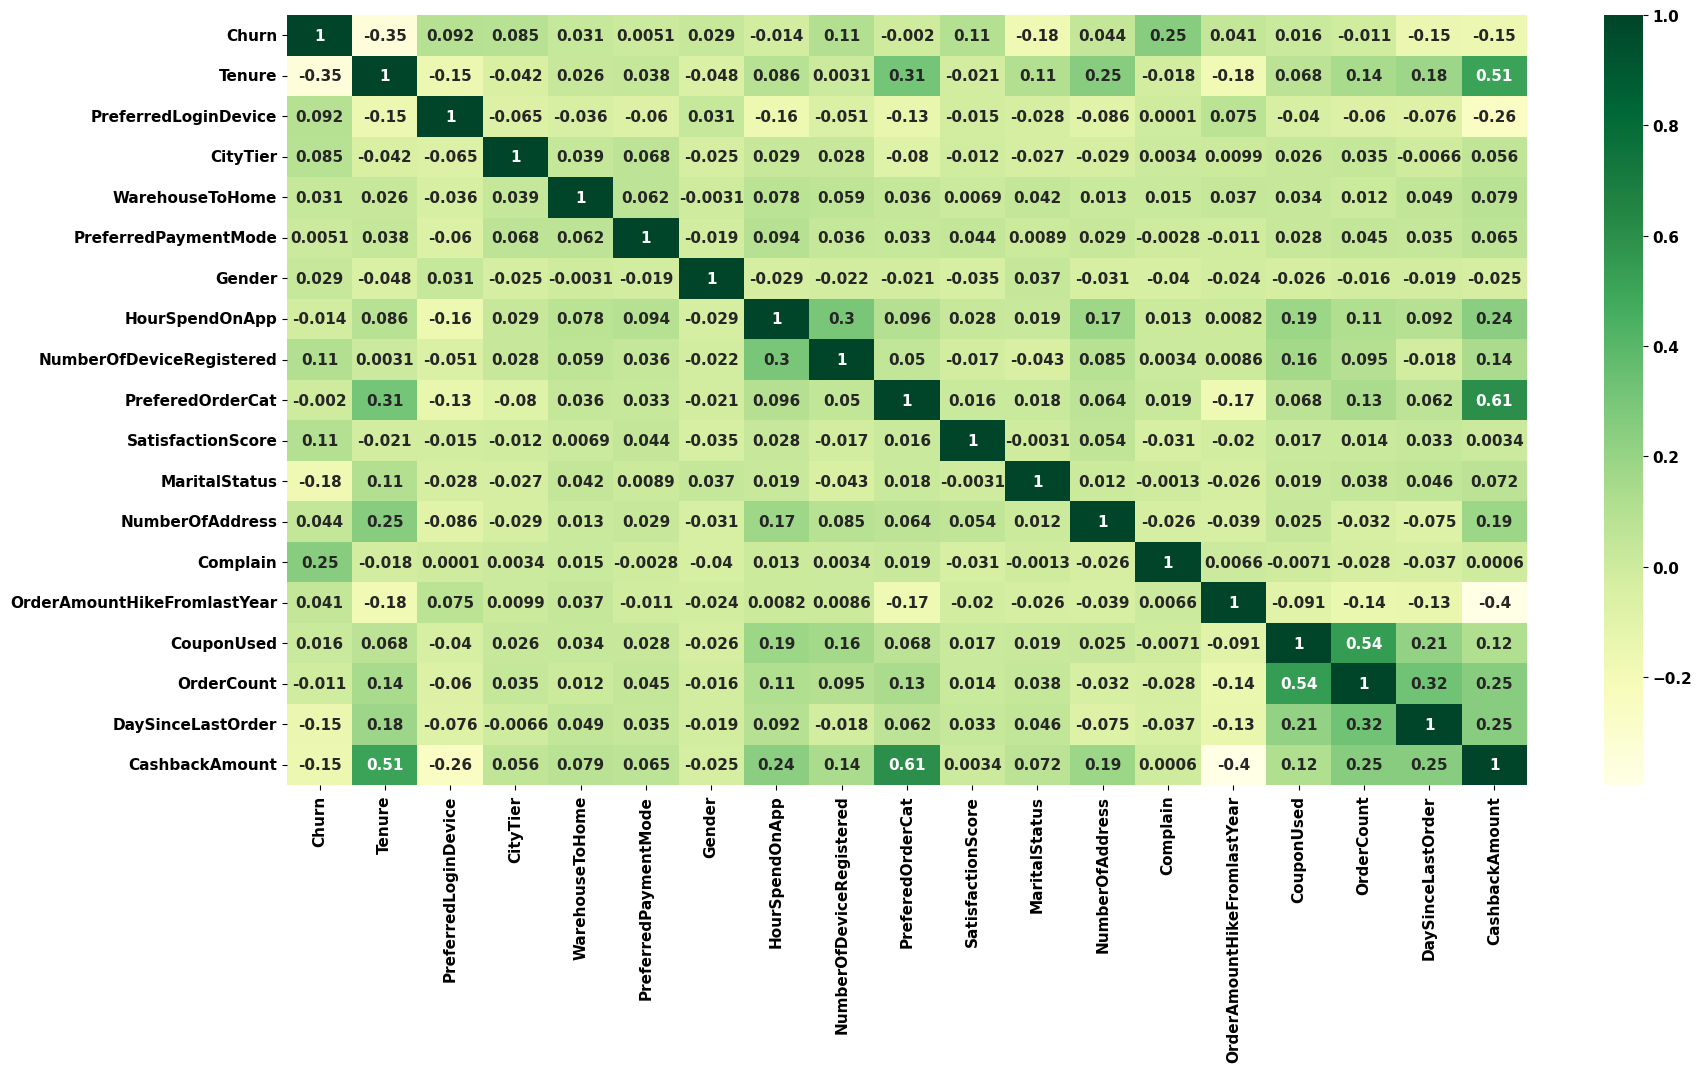

In [27]:
PreferredLoginDevice = ['Mobile Phone', 'Phone', 'Computer']
PreferredPaymentMode = ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card']
Gender = ['Female', 'Male']
PreferedOrderCat = ['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']
MaritalStatus = ['Single', 'Divorced', 'Married']
data = Commerce2.copy()
data['PreferredLoginDevice']=data['PreferredLoginDevice'].apply(lambda  x:  PreferredLoginDevice.index(str(x))/3.0)
data['PreferredPaymentMode']=data['PreferredPaymentMode'].apply(lambda  x:  PreferredPaymentMode.index(str(x))/7.0)
data['Gender']=data['Gender'].apply(lambda  x:  Gender.index(str(x))/2.0)
data['PreferedOrderCat']=data['PreferedOrderCat'].apply(lambda  x:  PreferedOrderCat.index(str(x))/6.0)
data['MaritalStatus']=data['MaritalStatus'].apply(lambda  x:  MaritalStatus.index(str(x))/3.0)
data['CustomerID']=data['CustomerID'].apply(lambda  x: ((55630.0-float(x))/5630.0))
data['Churn']=data['Churn'].apply(lambda  x: float(x))
data['CityTier']=data['CityTier'].apply(lambda  x: float(x)/3.0)
data['NumberOfDeviceRegistered']=data['NumberOfDeviceRegistered'].apply(lambda  x: float(x)/6.0)
data['SatisfactionScore']=data['SatisfactionScore'].apply(lambda  x: float(x)/5.0)
data['CashbackAmount']=data['CashbackAmount'].apply(lambda  x: float(x)/220.0)
data['Complain']=data['Complain'].apply(lambda  x: float(x))
data['NumberOfAddress']=data['NumberOfAddress'].apply(lambda  x: float(x)/15.0)
data['Tenure']=data['Tenure'].apply(lambda  x: float(x)/37.0 if x is not None else -1.0/37.0)
data['HourSpendOnApp']=data['HourSpendOnApp'].apply(lambda  x: float(x)/7.0 if x is not None else -1/7.0)
data['DaySinceLastOrder']=data['DaySinceLastOrder'].apply(lambda  x: float(x)/23.0 if x is not None else -1/23.0)
data['CouponUsed']=data['CouponUsed'].apply(lambda  x: float(x)/18.0 if x is not None else -1/18.0)
data['OrderCount']=data['OrderCount'].apply(lambda  x: float(x)/17.0 if x is not None else -1/17.0)
data['WarehouseToHome']=data['WarehouseToHome'].apply(lambda  x: float(x)/35.0 if x is not None else -1/35.0)
data['OrderAmountHikeFromlastYear']=data['OrderAmountHikeFromlastYear'].apply(lambda  x: float(x)/17.0 if x is not None else -1/17.0)
data1 = data.drop(['CustomerID'],axis=1)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(), cmap="YlGn", annot=True)
plt.show()

In [28]:
k=0
for i in data:
  print(i, end='\t')
  for j in range(4):
    print(Commerce2[i][j], '\t', '{:.4f}'.format(data[i][j]),end='\t')
  print('', end='\n')

CustomerID	50001 	 0.9998	50002 	 0.9996	50003 	 0.9995	50004 	 0.9993	
Churn	1 	 1.0000	1 	 1.0000	1 	 1.0000	1 	 1.0000	
Tenure	4 	 0.1081	None 	 -0.0270	None 	 -0.0270	0 	 0.0000	
PreferredLoginDevice	Mobile Phone 	 0.0000	Phone 	 0.3333	Phone 	 0.3333	Phone 	 0.3333	
CityTier	3 	 1.0000	1 	 0.3333	1 	 0.3333	3 	 1.0000	
WarehouseToHome	6 	 0.1714	8 	 0.2286	30 	 0.8571	15 	 0.4286	
PreferredPaymentMode	Debit Card 	 0.0000	UPI 	 0.1429	Debit Card 	 0.0000	Debit Card 	 0.0000	
Gender	Female 	 0.0000	Male 	 0.5000	Male 	 0.5000	Male 	 0.5000	
HourSpendOnApp	3 	 0.4286	3 	 0.4286	2 	 0.2857	2 	 0.2857	
NumberOfDeviceRegistered	3 	 0.5000	4 	 0.6667	4 	 0.6667	4 	 0.6667	
PreferedOrderCat	Laptop & Accessory 	 0.0000	Mobile 	 0.1667	Mobile 	 0.1667	Laptop & Accessory 	 0.0000	
SatisfactionScore	2 	 0.4000	3 	 0.6000	3 	 0.6000	5 	 1.0000	
MaritalStatus	Single 	 0.0000	Single 	 0.0000	Single 	 0.0000	Single 	 0.0000	
NumberOfAddress	9 	 0.6000	7 	 0.4667	6 	 0.4000	8 	 0.5333	
Complain	1 

In [29]:
from sklearn.model_selection import train_test_split
from collections import Counter
data = data.drop(['CustomerID'],axis=1)
data = data.drop(['NumberOfDeviceRegistered'],axis=1)
data = data.drop(['CouponUsed'],axis=1)
X=data.drop(['Churn'],axis=1).to_numpy()
y=data['Churn'].to_numpy()
from imblearn.over_sampling import SMOTE ,BorderlineSMOTE ,ADASYN
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
print(type(X_train))
print(X_train.shape)
print(type(X_test))
print(X_test.shape)

Counter({1.0: 4682, 0.0: 4682})
<class 'numpy.ndarray'>
(7023, 16)
<class 'numpy.ndarray'>
(2341, 16)


<Figure size 640x480 with 0 Axes>

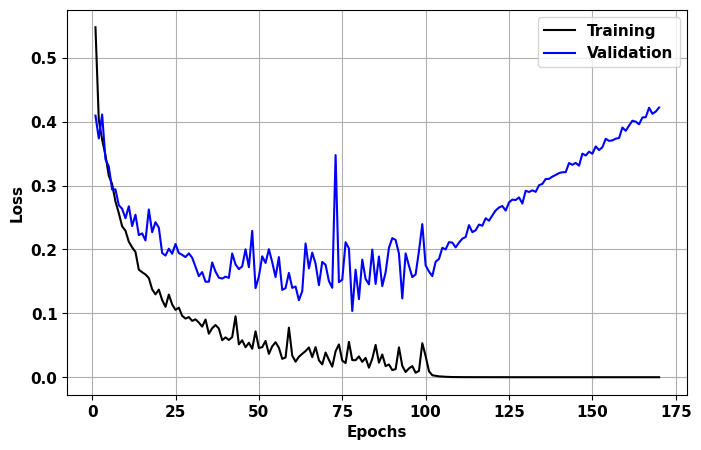

<Figure size 640x480 with 0 Axes>

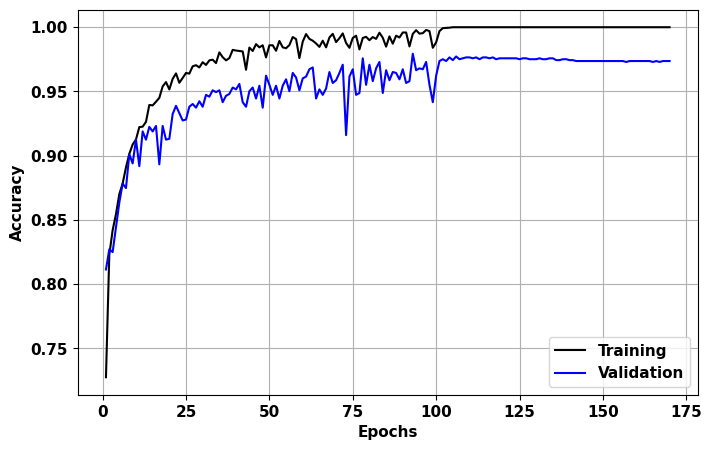

74/74 [==============================] - 0s 2ms/step - loss: 0.2373 - acc: 0.9821
[0.2372751235961914, 0.9820589423179626]
220/220 [==============================] - 0s 2ms/step - loss: 0.0844 - acc: 0.9947
[0.08443375676870346, 0.994731605052948]


In [30]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold
    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["val_acc"]
        if accuracy >= self.threshold:
            self.model.stop_training = True
early_stop=MyThresholdCallback(threshold=1.963)
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(16,), name="input"))
model.add(layers.Dense(50,name="hidden_1", activation='relu'))
model.add(layers.Dense(40,name="hidden_2", activation='relu'))
model.add(layers.Dense(30,name="hidden_3", activation='relu'))
model.add(layers.Dense(20,name="hidden_4", activation='relu'))
model.add(layers.Dense(10,name="hidden_5", activation='relu'))
model.add(layers.Dense(5,name="hidden_6", activation='relu'))
model.add(layers.Dense(1,name="output", activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=170, batch_size=25,shuffle=True,validation_split=0.2,verbose=0,callbacks=[early_stop])
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure()
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values, 'k', label='Training')
plt.plot(epochs, val_loss_values, 'b', label='Validation')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()
plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'k', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()
results = model.evaluate(X_test, y_test)
print(results)
results = model.evaluate(X_train, y_train)
print(results)

In [36]:
model_imba=model
model.save('model_BorderlineSMOTE.h5')
import pandas as pd
history_ba = pd.DataFrame(history.history)
hist_csv_file = '/content/history_ba.csv'
with open(hist_csv_file, mode='w') as f:
    history_ba.to_csv(f)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 50)                850       
                                                                 
 hidden_2 (Dense)            (None, 40)                2040      
                                                                 
 hidden_3 (Dense)            (None, 30)                1230      
                                                                 
 hidden_4 (Dense)            (None, 20)                620       
                                                                 
 hidden_5 (Dense)            (None, 10)                210       
                                                                 
 hidden_6 (Dense)            (None, 5)                 55        
                                                                 
 output (Dense)              (None, 1)                 6

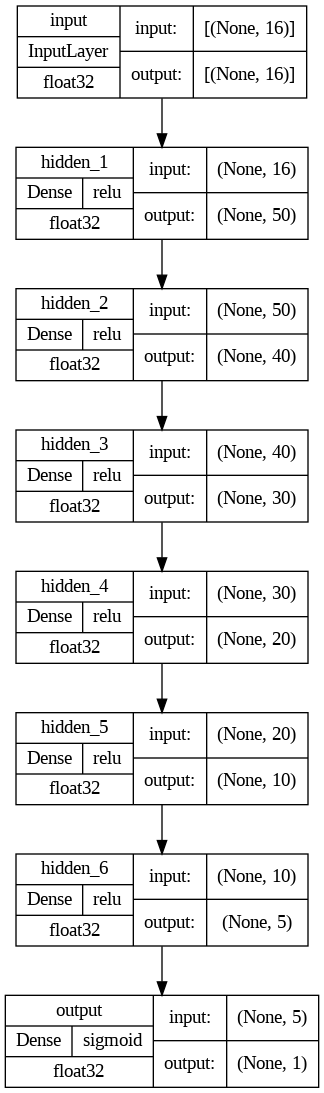

In [37]:
model.summary()
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/ML/zzzzlstm_model.png', show_shapes=True,show_dtype=True, show_layer_names=True,expand_nested=True, show_trainable=False, show_layer_activations=True)

<Figure size 640x480 with 0 Axes>

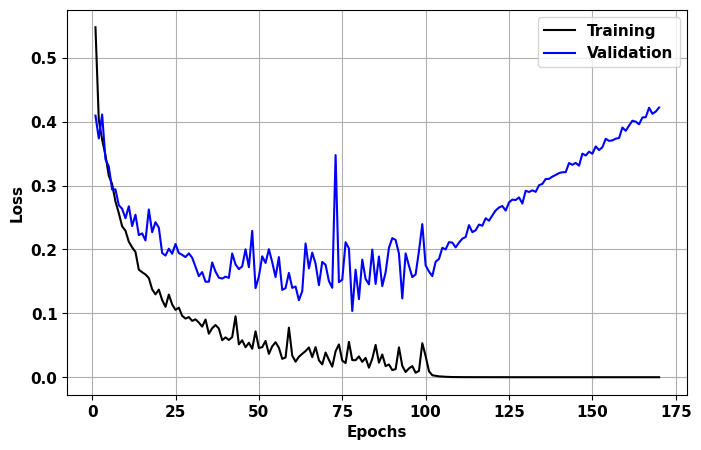

<Figure size 640x480 with 0 Axes>

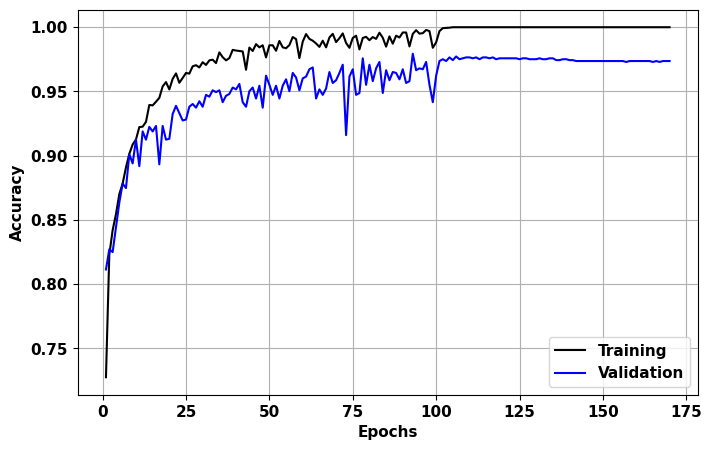

74/74 [==============================] - 0s 5ms/step - loss: 0.2373 - acc: 0.9821
[0.2372751235961914, 0.9820589423179626]
220/220 [==============================] - 1s 5ms/step
[0.08443375676870346, 0.994731605052948]
traing [1.3472552e-22]
traing [1.]
traing [1.]
traing [0.99999994]
traing [1.]
traing [2.2964809e-17]
traing [1.0275895e-08]
traing [1.]
traing [4.358917e-18]
traing [1.]
traing [4.325913e-21]
74/74 [==============================] - 1s 9ms/step
Test Accuracy: 0.9821
Test F1-score: 0.9822
Test precision: 0.9732
Test recall: 0.9915
 1 = 1170
 0 = 238
[[1139   32]
 [  10 1160]]


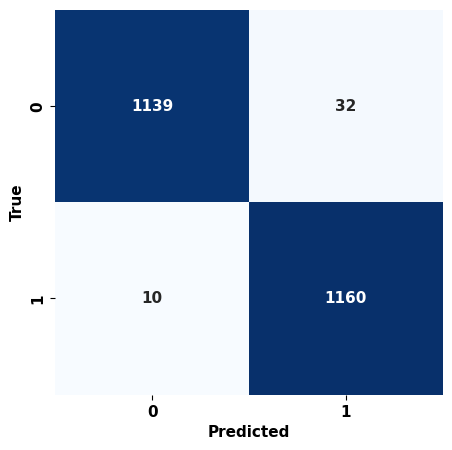

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure()
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values, 'k', label='Training')
plt.plot(epochs, val_loss_values, 'b', label='Validation')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()
plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'k', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()
results = model.evaluate(X_test, y_test)
print(results)
results = model.evaluate(X_train, y_train)
hhhhh= model.predict(X_train)
print(results)
ll=0
for i in hhhhh:
  print('traing',i)
  if ll==10:
    break
  ll=ll+1
test_true_labels = y_test.tolist()
predict_x=model.predict(X_test)
a = (predict_x>=0.5).astype(int).ravel()
a = [ int(i) for i in a]
b = [ int(i) for i in test_true_labels]
test_f1 = f1_score(b, a)
test_accuracy = accuracy_score(b, a)
precision = precision_score(b, a)
recall = recall_score(b, a)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-score: {test_f1:.4f}")
print(f"Test precision: {precision:.4f}")
print(f"Test recall: {recall:.4f}")
print (' 1 =',sum(b))
print (' 0 =',1408-sum(b))
cm = confusion_matrix(b, a)
print(cm)
classes = ['0', '1']
cm_normalized = cm
plt.figure(figsize=(5,5))
sns.heatmap(cm_normalized, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Predicted', fontsize=11,weight='bold')
plt.ylabel('True', fontsize=11,weight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

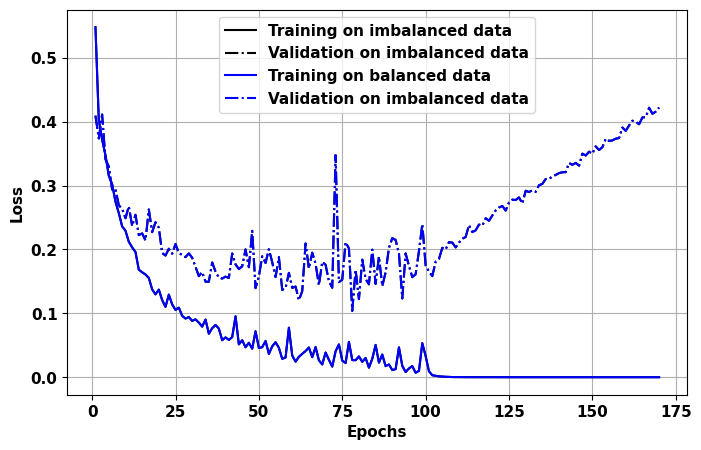

<Figure size 640x480 with 0 Axes>

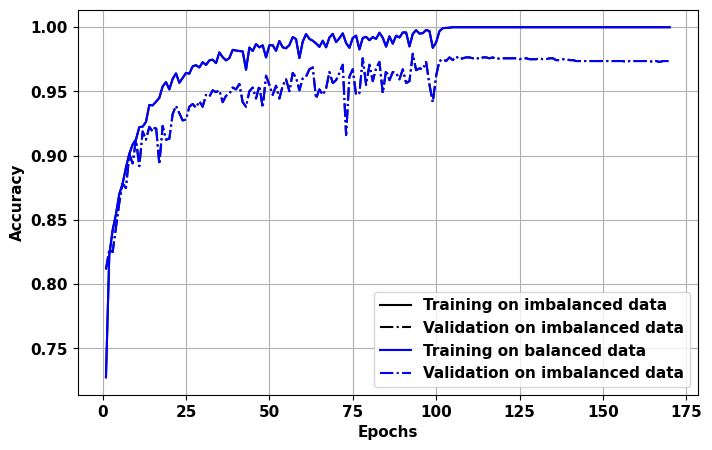

In [39]:
df_mb = pd.read_csv("/content/history_imba.csv")
df_b = pd.read_csv("/content/history_ba.csv")
loss_values_ba = df_b['loss']
val_loss_values_ba = df_b['val_loss']
loss_values_imba = df_mb['loss']
val_loss_values_imba = df_mb['val_loss']
epochs = range(1, len(loss_values_imba) + 1)
plt.figure()
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values_imba, 'k', label='Training on imbalanced data')
plt.plot(epochs, val_loss_values_imba, 'k-.', label='Validation on imbalanced data')
plt.plot(epochs, loss_values_ba, 'b', label='Training on balanced data')
plt.plot(epochs, val_loss_values_ba, 'b-.', label='Validation on imbalanced data')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()
plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
acc_values_imba = df_mb['acc']
val_acc_values_imba = df_mb['val_acc']
acc_values_ba = df_b['acc']
val_acc_values_ba = df_b['val_acc']
plt.plot(epochs, acc_values_imba, 'k', label='Training on imbalanced data')
plt.plot(epochs, val_acc_values_imba, 'k-.', label='Validation on imbalanced data')
plt.plot(epochs, acc_values_ba,  'b', label='Training on balanced data')
plt.plot(epochs, val_acc_values_ba, 'b-.', label='Validation on imbalanced data')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()

74/74 [==============================] - 0s 3ms/step
2341
( 1 )  0.0  :  0.9767505  , ( 2 )  0.0  :  0.35668907  , ( 3 )  1.0  :  0.100830786  , ( 4 )  0.0  :  0.9464395  , ( 5 )  0.0  :  0.98340523  , ( 6 )  0.0  :  0.98987794  , ( 7 )  0.0  :  0.8841587  , ( 8 )  1.0  :  0.34129435  , ( 9 )  1.0  :  0.16488434  , ( 10 )  1.0  :  0.26397413  , ( 11 )  1.0  :  0.9874814  , ( 12 )  1.0  :  0.98889464  , ( 13 )  1.0  :  0.70884824  , ( 14 )  1.0  :  0.89400804  , ( 15 )  1.0  :  0.96660745  , ( 16 )  1.0  :  0.8716425  , ( 17 )  0.0  :  0.134569  , ( 18 )  0.0  :  0.53490055  , 18
18


<Figure size 640x480 with 0 Axes>

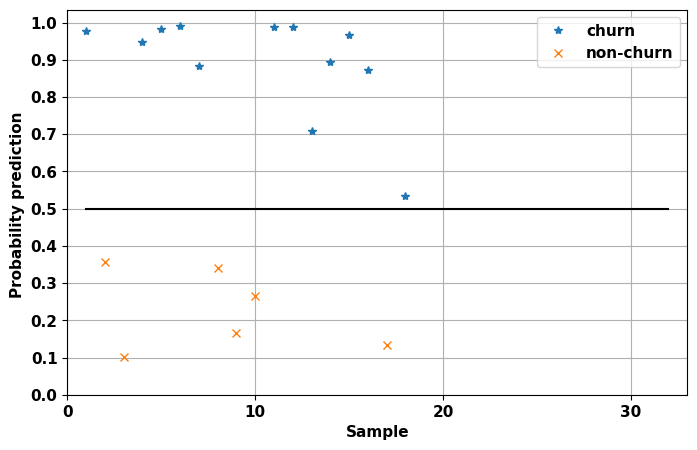

In [40]:
p = model.predict(X_test)
print(len(p))
pp=[]
nch =[]
ch =[]
yy=[];
yy1=[];
yy2=[];
kl=1
for j,i in enumerate(p):
  if i >0.1 and i <0.99:
    pp.append(i)
    yy.append(y_test[j])
    print('(', kl,') ', y_train[j], " : ", i[0] ," , " ,end= '')
    if i<0.5:
      nch.append(i)
      yy2.append(kl)
    else:
      ch.append(i)
      yy1.append(kl)
    kl=kl+1
print(len(pp))
print(len(yy))
samples = range(1, len(pp) + 1)
lin=[0.5]*(len(pp)+14)
ax = plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
plt.plot(yy1, ch, '*', label='churn')
plt.plot(yy2, nch, 'x', label='non-churn')
plt.plot(range(1, len(lin) + 1),lin, 'k')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Sample', fontsize=11,weight='bold')
plt.ylabel('Probability prediction ', fontsize=11,weight='bold')
plt.legend()
plt.xticks(range(0,len(pp)+15,10))
plt.yticks([i/10.0 for i in range(11) ])
plt.grid()
plt.xlim(0,len(pp)+15)
plt.show()

In [ ]:
data = data.copy()
v=['CustomerID','Churn','Tenure','PreferredLoginDevice','CityTier','WarehouseToHome','PreferredPaymentMode','Gender','HourSpendOnApp','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
for i in v:
  y = data[i]
  ko=[]
  k=0
  for i, len1 in enumerate(y):
    if len1 not in ko:
      k=k+1
      ko.append(len1)
  print(k,end='\n')


5630
2
37
3
3
35
7
2
7
6
6
5
3
15
2
17
18
17
23
220


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.8 MB/s eta 0:00:00


PermutationExplainer explainer: 7024it [25:35,  4.56it/s]


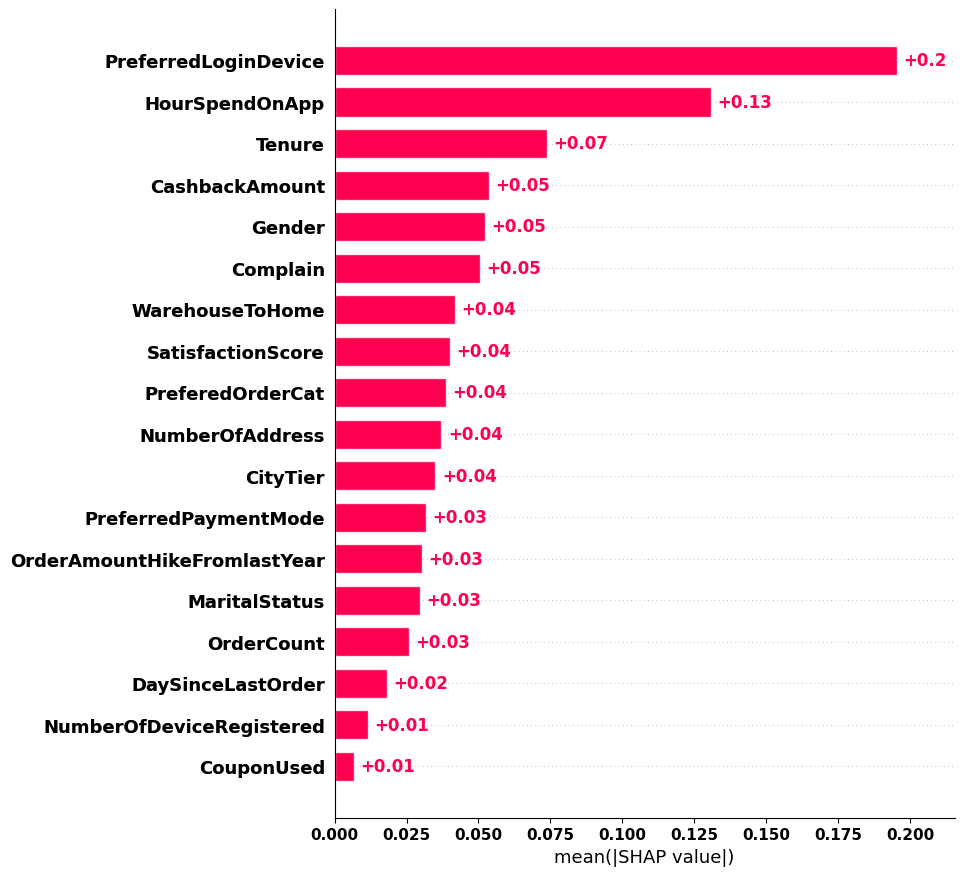

In [ ]:
import pandas as pd
import numpy as np
import shap
shap.initjs()
X =X_train
Y=  y_train
my_array = np.array(X)
gme=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','CityTier','NumberOfDeviceRegistered','SatisfactionScore','CashbackAmount','Complain','NumberOfAddress','Tenure','HourSpendOnApp','DaySinceLastOrder','CouponUsed','OrderCount','WarehouseToHome','OrderAmountHikeFromlastYear']
df = pd.DataFrame(my_array, columns = gme)
explainer1 = shap.Explainer(model, X)
shap_values1 = explainer1(X)
shap_values1.feature_names =gme
df2 = pd.DataFrame(my_array, columns = gme)
shap.plots.bar(shap_values1,max_display=18)

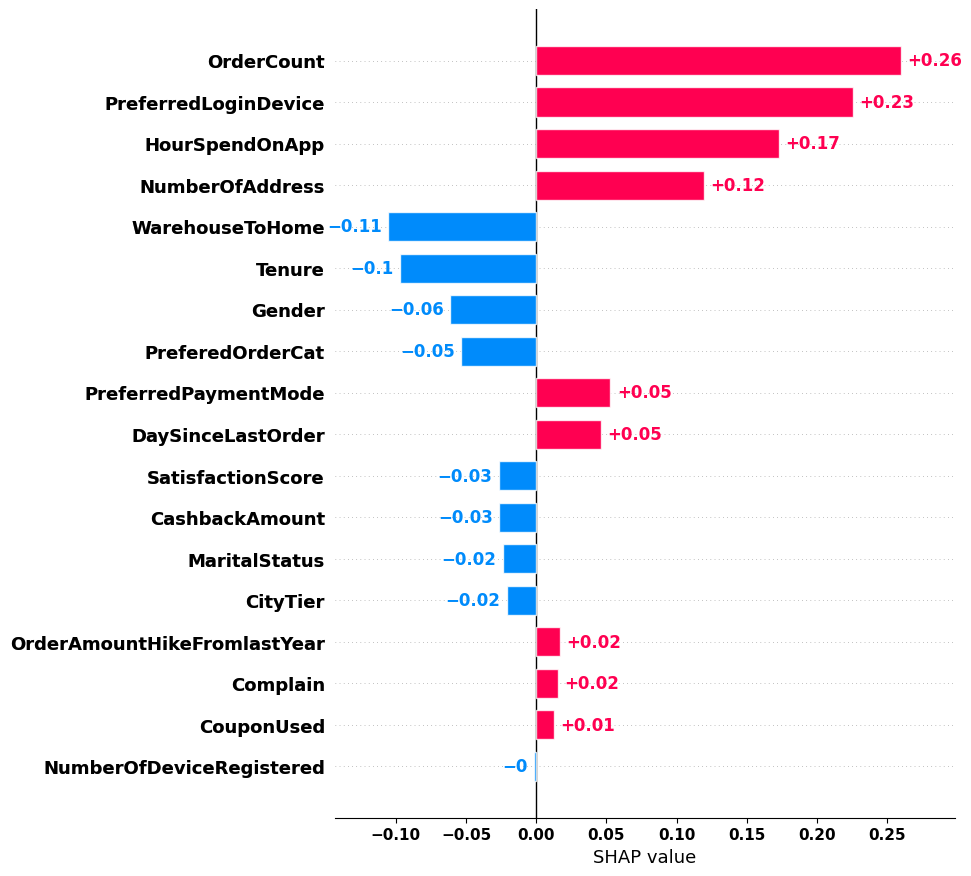

.values =
array([ 0.2256453 ,  0.05283684, -0.06155144, -0.05344403, -0.02378046,
       -0.02105765, -0.00154591, -0.02678845, -0.02631917,  0.01544162,
        0.11978006, -0.09743341,  0.17295607,  0.04631075,  0.01283182,
        0.25970928, -0.10536271,  0.0170442 ])

.base_values =
array([0.48548534])

.data =
array([0.        , 0.66666667, 0.33333333, 0.25714286, 0.        ,
       0.5       , 0.42857143, 0.5       , 0.16666667, 1.        ,
       0.        , 0.13333333, 1.        , 0.64705882, 0.27777778,
       0.52941176, 0.30434783, 0.60454545])
.values =
0.22564530346310022

.base_values =
0.4854853355311151

.data =
0.0


In [ ]:
shap.plots.bar(shap_values1[1],max_display=18)

[0.08609960498370982, 0.016817531371777623, 0.027611829541350285, 0.022427969209901522, 0.015235308074246267, 0.016144853209075907, 0.006007310606197782, 0.012788475987379219, 0.025619131396943322, 0.028730247167604632, 0.018216006632834677, 0.04303863364259086, 0.06242365572644488, 0.00865155107464203, 0.00421043193262443, 0.011095076310140917, 0.02548879147056098, 0.013194921840182106]
[0.10933135225009556, 0.014946895944460687, 0.024515718515445147, 0.016190224417900634, 0.014426006674662064, 0.018881829561235186, 0.005505158480274876, 0.027327047413558823, 0.028033253580575013, 0.021672735067150495, 0.018909504976043243, 0.03068157046066156, 0.06838653760362211, 0.009544291256774903, 0.0024339744534717617, 0.014750667447547746, 0.016340290646916507, 0.017129013179916743]
[0.00421043193262443, 0.006007310606197782, 0.00865155107464203, 0.011095076310140917, 0.015235308074246267, 0.013194921840182106, 0.016817531371777623, 0.016144853209075907, 0.018216006632834677, 0.022427969209901

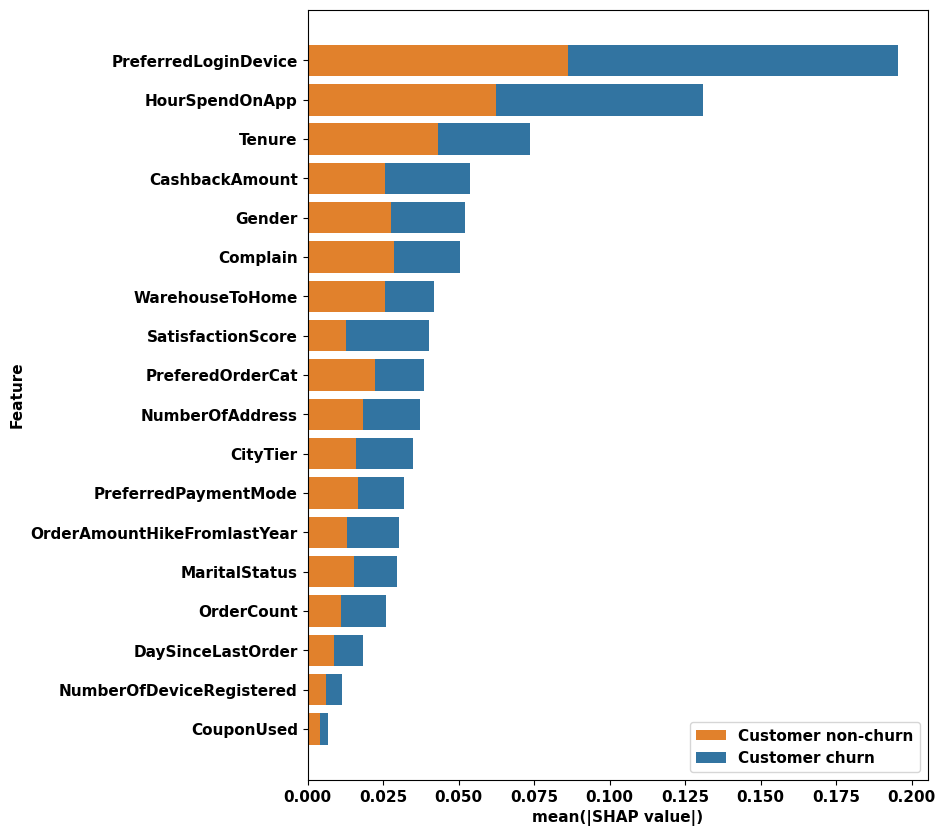

In [ ]:
f1=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]];
f2=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]];
for i,j in  enumerate(shap_values1.values):
  for h in range(18):
    if j[h] >0:
      f1[h][0]=f1[h][0] + abs(j[h])
      f1[h][1]=  f1[h][1]+1
    else:
      f2[h][0]=f2[h][0] + abs(j[h])
      f2[h][1]=  f2[h][1]+1
f22=[]
f11=[]
f33=[]
for j, i  in  enumerate(f1):
  f11.append(i[0]/(f2[j][1] +i[1]))
  f22.append(f2[j][0]/(f2[j][1] +i[1]) )
  f33.append(f2[j][0]/(f2[j][1] +i[1])  + i[0]/(f2[j][1] +i[1]))
f321 = f22
f322 = f11
f333= f33
print(f321)
print(f322)
gme=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','CityTier','NumberOfDeviceRegistered','SatisfactionScore','CashbackAmount','Complain','NumberOfAddress','Tenure','HourSpendOnApp','DaySinceLastOrder','CouponUsed','OrderCount','WarehouseToHome','OrderAmountHikeFromlastYear']
for i in range(len(f333)):
  for j in range(len(f333)):
     if f333[i]<f333[j]:
        gme[j],gme[i]   = (gme[i],gme[j])
        f321[j],f321[i] = (f321[i],f321[j])
        f322[j],f322[i] = (f322[i],f322[j])
        f333[j],f333[i] = (f333[i],f333[j])
print(f321)
print(f322)
f6 =gme
data=[f321,f322]
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(18)
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Feature',fontsize=11,weight='bold')
plt.xlabel('mean(|SHAP value|)',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()